# Online Fraud Detection
The introduction of online payment systems has made it possible to optimize the customer experience, as all transactions can be carried out from anywhere and without time constraints. However, at the same time, payment fraud has increased, particularly when making payments using a credit card, which has become a security issue. This is the primary reason why it is essential detect online payment fraud for credit card companies to in order to ensure that customers are not charged for products and services that they never bought, received or paid for. My personal goal in this project is to learn and grow in the world of data science while learning by doing.
## Data understanding
The data we are going to use is in a file called 'onlinefraud.csv' and it consists of 493.53 MB of data size. The dataset comes from Kaggle and consist of 14,051,279 entries about online credit card fraud transactions, distributed in 11 columns with 1,277,389 entries each. To identify online payment fraud with machine learning, a machine learning model needs to be trained for classifying fraudulent and non-fraudulent transactions. We handled imbalanced data and normalized it through Random Oversampling to help model performance with imbalanced data, and applied the Synthetic Minority Oversampling Technique (SMOTE). For classification machine learning algorithms, feature engineering was used to encode categorical variables and then compare to choose the best model.


## 1.Required Libraries
>Import all necessary libraries for the analysis, such as data loading, statistical analysis, visualizations, data transformations, merges, and joins, machine learning, etc.

In [2]:
import warnings 
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format ='retina'
%matplotlib inline 

# required libraries
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from IPython.display import display_html
from itertools import chain,cycle
import missingno as msno
import time
from collections import Counter

# model 
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import concurrent.futures
from sklearn.model_selection import train_test_split


# model with SMOTE & RandomUnderSampler 
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

print("Libraries imported!")
%time

Libraries imported!
CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 7.15 µs


## 2.Reading Dataset
>Our data is available in a tabular format of CSV files, which is easy to access.        
- 2.1 The the function read_csv() are used to convert the data to a pandas DataFrame.
The Pandas library offers a wide range of possibilities for loading data into a Pandas DataFrame from files such as .csv, .sql, .html, .txt, .xlsx, .pickle, JSON, and images, etc.

Learn more: https://www.w3schools.com/python/pandas/pandas_intro.asp

In [3]:
# 2.1)data download
df = data = pd.read_csv("onlinefraud.csv")
# series into pandas 
df = pd.DataFrame(df)

- 2.2 Pandas has an Options API which can be used to configure and customize global behavior related to DataFrame display, data behavior, and more.

Lean more: https://pandas.pydata.org/docs/user_guide/options.html

In [4]:
# 2.2) Pandas Configuration Options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 400)
pd.set_option('display.min_rows', 10)
pd.set_option('display.expand_frame_repr', True)
color = ['maroon','lightsalmon','navy','indianred','salmon']

- 2.3 HTML are used for diferent styles on outputs such as markdown table side orientation, display side by side, etc.

Lean more: https://realpython.com/html-css-python/

In [5]:
# 2.3)tabs & crosstab side to side
# Table style & display side by side

def display_side_by_side(*args,tittle=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(tittle,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [6]:
%%html
<style>
table {float:left}
</style>

- 2.4 Dataset variable description

Dataset variable description
 | Column Name      | Description                                          |
 | ---------------- | ---------------------------------------------------- |
 |step              | A unit of time where 1 step equals 1 hour            |
 |type              | Type of online transaction                           |
 |amount            | The amount of the transaction                        |
 |nameOrig          | Customer starting the transaction                    |
 |oldbalanceOrg     | Balance before the transaction                       |
 |newbalanceOrig    | Balance after the transaction                        |
 |nameDest          | Recipient of the transaction                         |
 |oldbalanceDest    | Initial balance of recipient before the transaction  |
 |newbalanceDest    | The new balance of recipient after the transaction   |
 |isFraud           | Fraud transaction                                    |
 

## 3. Exploratory Data Analisys (EDA)
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

Learn more: https://www.ibm.com/topics/exploratory-data-analysis

#### 3.1 Data exploration
>Before making any inferences, examine all variables in the dataset.
Data exploration is the first step of data analysis, used to explore and visualize data in order to uncover insights from the outset or identify areas or patterns to investigate further. Through the use of tables and graphs, can gain a better understanding of the bigger picture and gain insights faster. 

##### Data information                   
Index Count, Entries, Unique, Dtype, Missing, Missing-Percent      
**replace using data.info(), etc* 

In [7]:
# 3.1)info panel tab variables
df_len = data.count()
null = data.isnull().sum().sort_values(ascending=False)
unique = data.nunique()
dtypes = data.dtypes
not_null = data.notna().sum()
dup_df = data.duplicated()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
# create info dataframe with header names
info = pd.concat([df_len,not_null,unique,dtypes,null,percent],axis=1,keys=('Index Count','Entries','Unique','Dtype','Missing','Missing-Percent'))

In [8]:
# 3.1)display info frame
info.style.background_gradient(cmap = 'RdBu') 

,Index Count,Entries,Unique,Dtype,Missing,Missing-Percent
step,1277389,1277389,135,int64,0,0.000000
type,1277389,1277389,5,object,0,0.000000
amount,1277389,1277389,1222783,float64,0,0.000000
nameOrig,1277389,1277389,1277006,object,0,0.000000
oldbalanceOrg,1277389,1277389,485116,float64,0,0.000000
newbalanceOrig,1277389,1277389,560732,float64,0,0.000000
nameDest,1277389,1277389,546958,object,0,0.000000
oldbalanceDest,1277389,1277389,735244,float64,0,0.000000
newbalanceDest,1277389,1277389,571445,float64,0,0.000000
isFraud,1277389,1277389,2,int64,0,0.000000


#### 3.2 Data Undestanding                
The main goal of data understanding is to gain general insights about the data that can be helpful in further steps, and it is a crucial step in every data analysis project.
>- The text includes an explanatory summary of the above dataframes, as well as information on duplicates, data types, total entries, the number of columns,the data distribution, and the skewness, etc .

In [9]:
# 3.2)info dataframe variables
df_len_Entries = data.count().sum()
cols = len(data.columns)
dup = data.duplicated().sum()
nullSum = data.isnull().sum().sum()
unique_sum = data.nunique().sum()

In [10]:
# define entries column
df_len = data.count()
df_len = pd.DataFrame(df_len)
df_len = df_len.squeeze()# convert to series
df_len = data.count().drop_duplicates()
df_len = df_len.to_string(index=False)

In [11]:
# define dtype column
dtypes_count = data.dtypes.value_counts()
dtypes_count = pd.DataFrame(dtypes_count)
dtypes_count = dtypes_count.to_string(header=False)

In [12]:
# 3.2)explanation text
print(f'\nThis dataset consists of {df_len_Entries} entries distributed in {cols} columns with {df_len} entries each.\nIt has {dup} duplicated, {nullSum} missing data and {unique_sum} unique values. Also, for data dtypes include:')                     
print(f'{dtypes_count}\n')


This dataset consists of 14051279 entries distributed in 11 columns with 1277389 entries each.
It has 0 duplicated, 0 missing data and 5399427 unique values. Also, for data dtypes include:
float64  5
int64    3
object   3



#### 3.2 Display first rows      

In [13]:
# 3.2)first rows
data.head().style.background_gradient(cmap= "RdBu")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000,0,0
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000,0,0
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000,0,0


#### 3.3 Display last rows

In [14]:
# 3.3)last rows
data.tail().style.background_gradient(cmap= "RdBu")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1277384,135,CASH_OUT,409145.320000,C190972190,21565.000000,0.000000,C1082052603,304225.070000,720068.090000,0,0
1277385,135,CASH_OUT,512374.190000,C1838962767,0.000000,0.000000,C522696444,3560268.720000,4072642.900000,0,0
1277386,135,CASH_OUT,95609.270000,C1337823034,0.000000,0.000000,C1760872167,2273416.880000,2369026.160000,0,0
1277387,135,CASH_OUT,406953.980000,C1482488291,0.000000,0.000000,C1037967980,581682.680000,1200945.280000,0,0
1277388,135,CASH_OUT,74852.250000,C1127049479,0.000000,0.000000,C1691385829,1194743.350000,1269595.590000,0,0


First character in nameOrig and nameDest for each value account types:
>- "C" for customer
>- "M" for merchant

#### 3.4 Variables exploration

##### 3.4.1 Target variable: "isFraud"

In [15]:
# Count the occurrences of fraud and no fraud 
occurence = data.isFraud.value_counts()
ratio_cases = occurence/len(data)
type = pd.concat([occurence,ratio_cases],axis=1,keys=('Value counts','Ratio'))
type1 = pd.DataFrame(type).style.background_gradient(cmap ='RdBu')
type1.index = ['Not fraud 0','Fraud 1']
# display 
display(type1)

,Value counts,Ratio
0,1275849,0.998794
1,1540,0.001206


>- There are 1,540 transactions that were fraudulents.
>- The ratio of fraudulent transactions is very low; this is a case of class imbalance, which needs to be addressed in the next steps before modeling.

#### 3.4.2 step

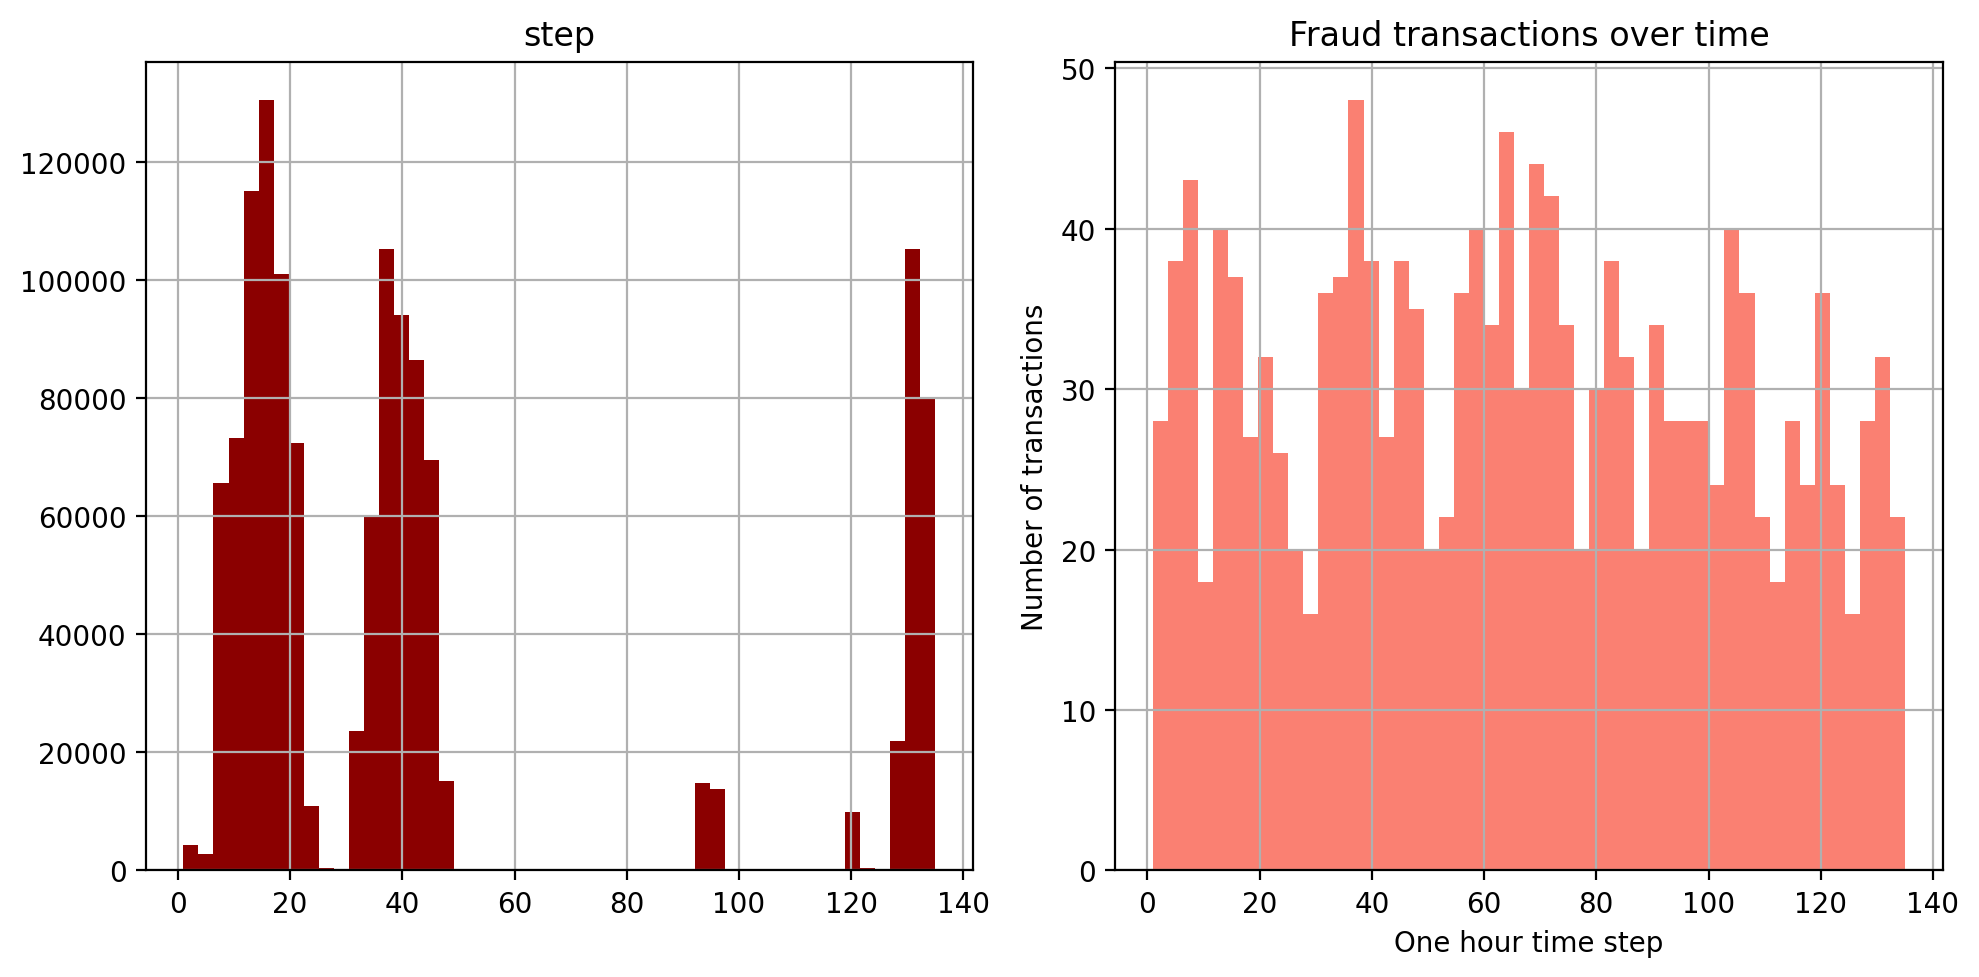

In [16]:
fraud = df[df.isFraud == 1]
not_fraud = df[df.isFraud == 0]

fig,ax1 = plt.subplots(1,2,figsize=(10, 5))
# Fraud transactions over time
bins = 50
axes = not_fraud.hist(column = "step", color = "darkred", bins = bins,ax=ax1[0])
ax = fraud.hist(column ="step",color="salmon", bins = bins,ax=ax1[1])
plt.xlabel("One hour time step")
plt.ylabel("Number of transactions")
plt.title("Fraud transactions over time")

plt.tight_layout()
plt.show()

>- A large proportion of not fraud transactions has changed over time, on the other hand the frequency of fraudulent transactions has not changed too much over time.

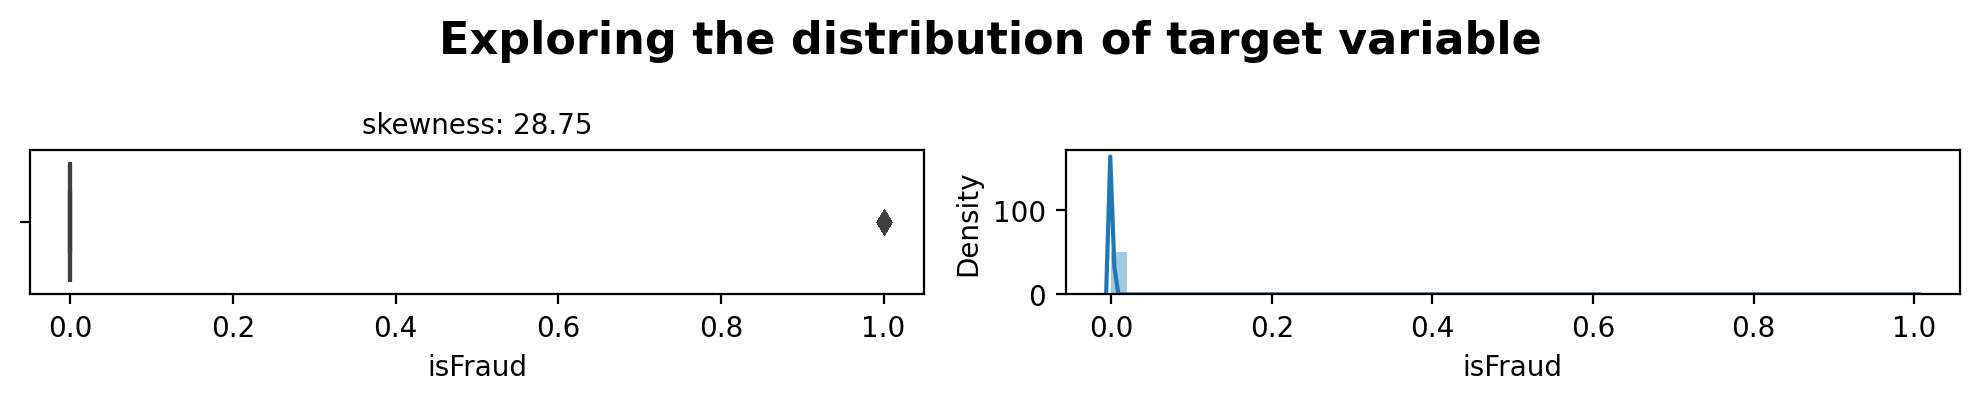

In [17]:
# target
fig, ax = plt.subplots(1, 2, figsize = (10,2))
sns.boxplot(x= data.isFraud, ax = ax[0]).set_title('skewness: '+str(round(data.isFraud.skew(axis= 0,skipna = True),2)),fontsize=10)
sns.distplot(data.isFraud, ax = ax[1])
fig.suptitle('Exploring the distribution of target variable', fontsize = 16, fontweight = "bold");
plt.tight_layout()
plt.subplots_adjust(top=0.8,hspace=1.8)
plt.tight_layout()

#### 3.4.3 Type

In [18]:
# calculate mean/average target variable
data.groupby(['type']).mean().style.background_gradient(cmap= "RdBu")

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_IN,45.826546,172326.115202,3754249.803771,3926553.456799,1456769.034778,1375221.629630,0.000000,0.000000
CASH_OUT,45.180223,188134.539320,55242.223517,24383.435587,1389466.555272,1638882.498362,0.001710,0.000000
DEBIT,42.626477,5824.789858,78032.245909,74338.197063,1292881.019593,1352039.390297,0.000000,0.000000
PAYMENT,45.137579,11871.748663,92904.649601,86681.830755,0.000000,0.000000,0.000000,0.000000
TRANSFER,45.803641,655369.324960,61320.570929,12732.802758,1992544.031946,2727470.088146,0.007194,0.000000


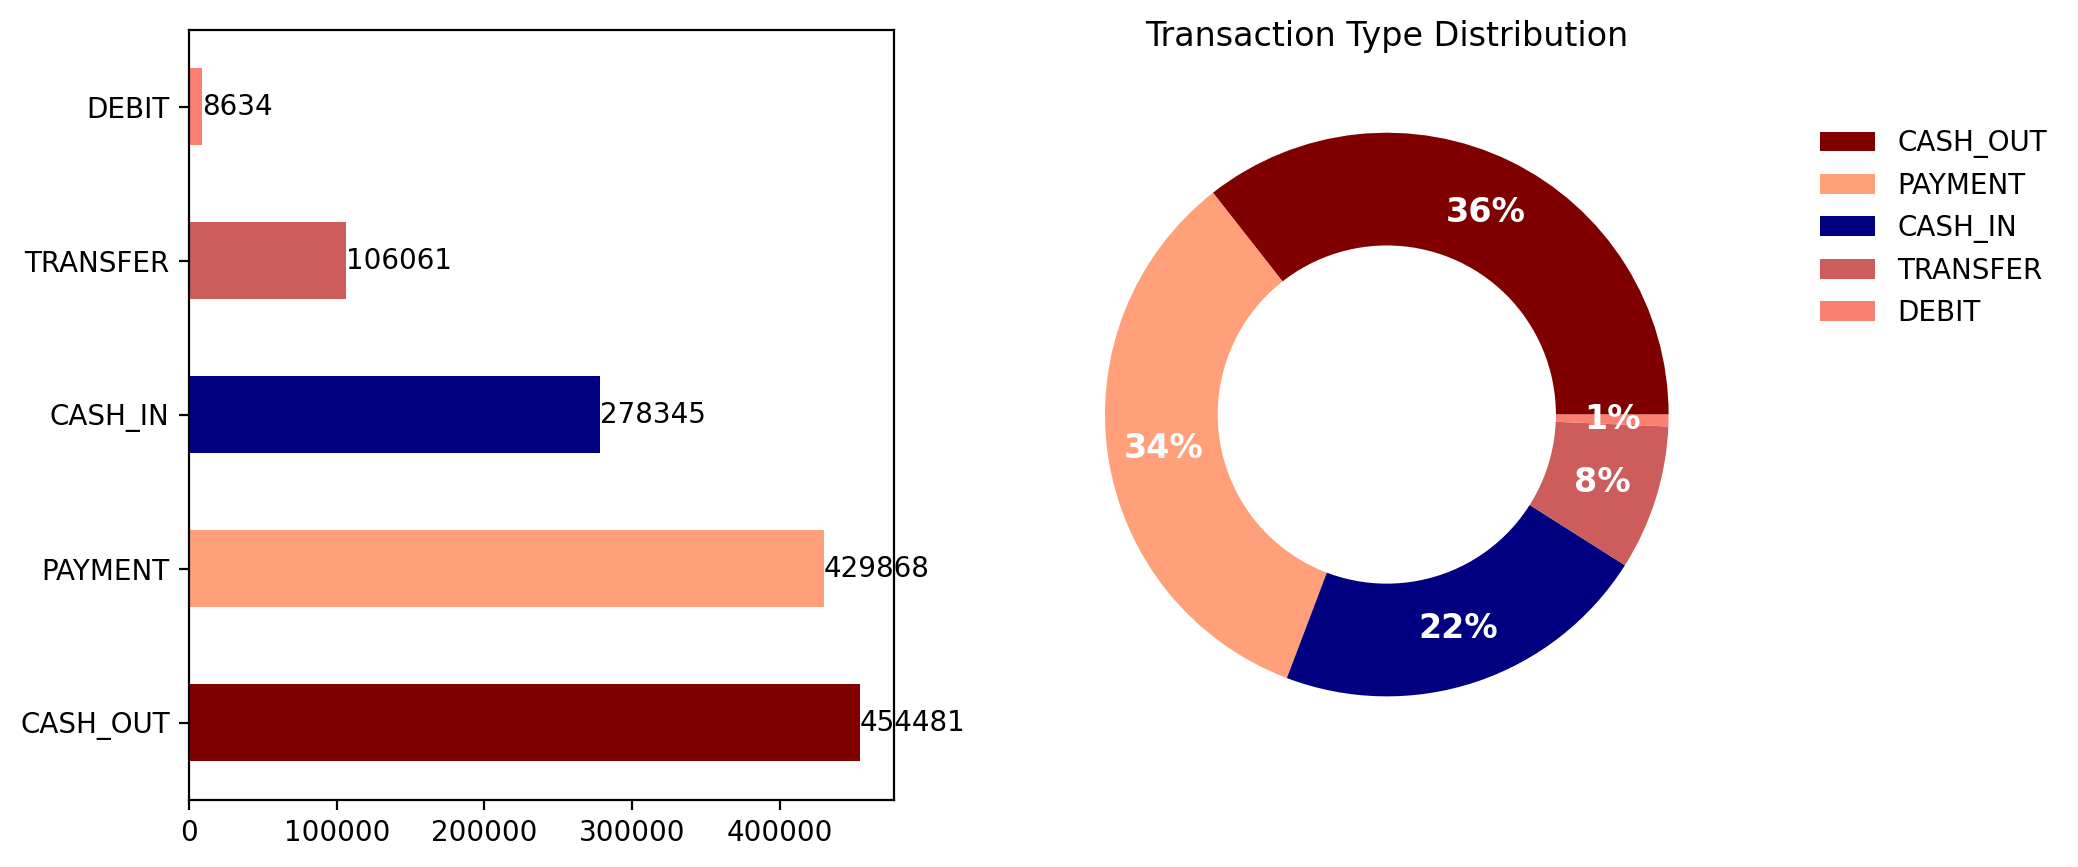

In [19]:
fig,ax1 = plt.subplots(1,2,figsize=(10, 5))
# barplot
ax = data.type.value_counts().plot.barh(color = color,ax=ax1[0])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Transaction Type Distribution')
plt.ylabel('Type')
plt.xlabel('Number of transactions')
plt.rc('axes',edgecolor='None')

# pie chart
axes = data.type.value_counts()
labels= axes.index
plt.pie(axes, labels=labels, autopct='%1.0f%%',textprops={'color':"w",'size': 12,'weight':'bold'},colors=color, pctdistance=0.8, labeldistance=1.1)
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf() 
fig.gca().add_artist(centre_circle)# Adding Circle in Pie chart
# tittle & legend
plt.title('Transaction Type Distribution')
plt.ylabel('')
plt.xlabel('')
#legend costumization
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2,framealpha=0.0)

>- The types of transactions are distributed unevenly, with CASH OUT at 36% with 454481 transactions and PAYMENT at 34% with 429868, having the highest numbers of transactions.
>
Let us explore from where fraudulent transactions originate.

#### Which type of transaction has fraud?

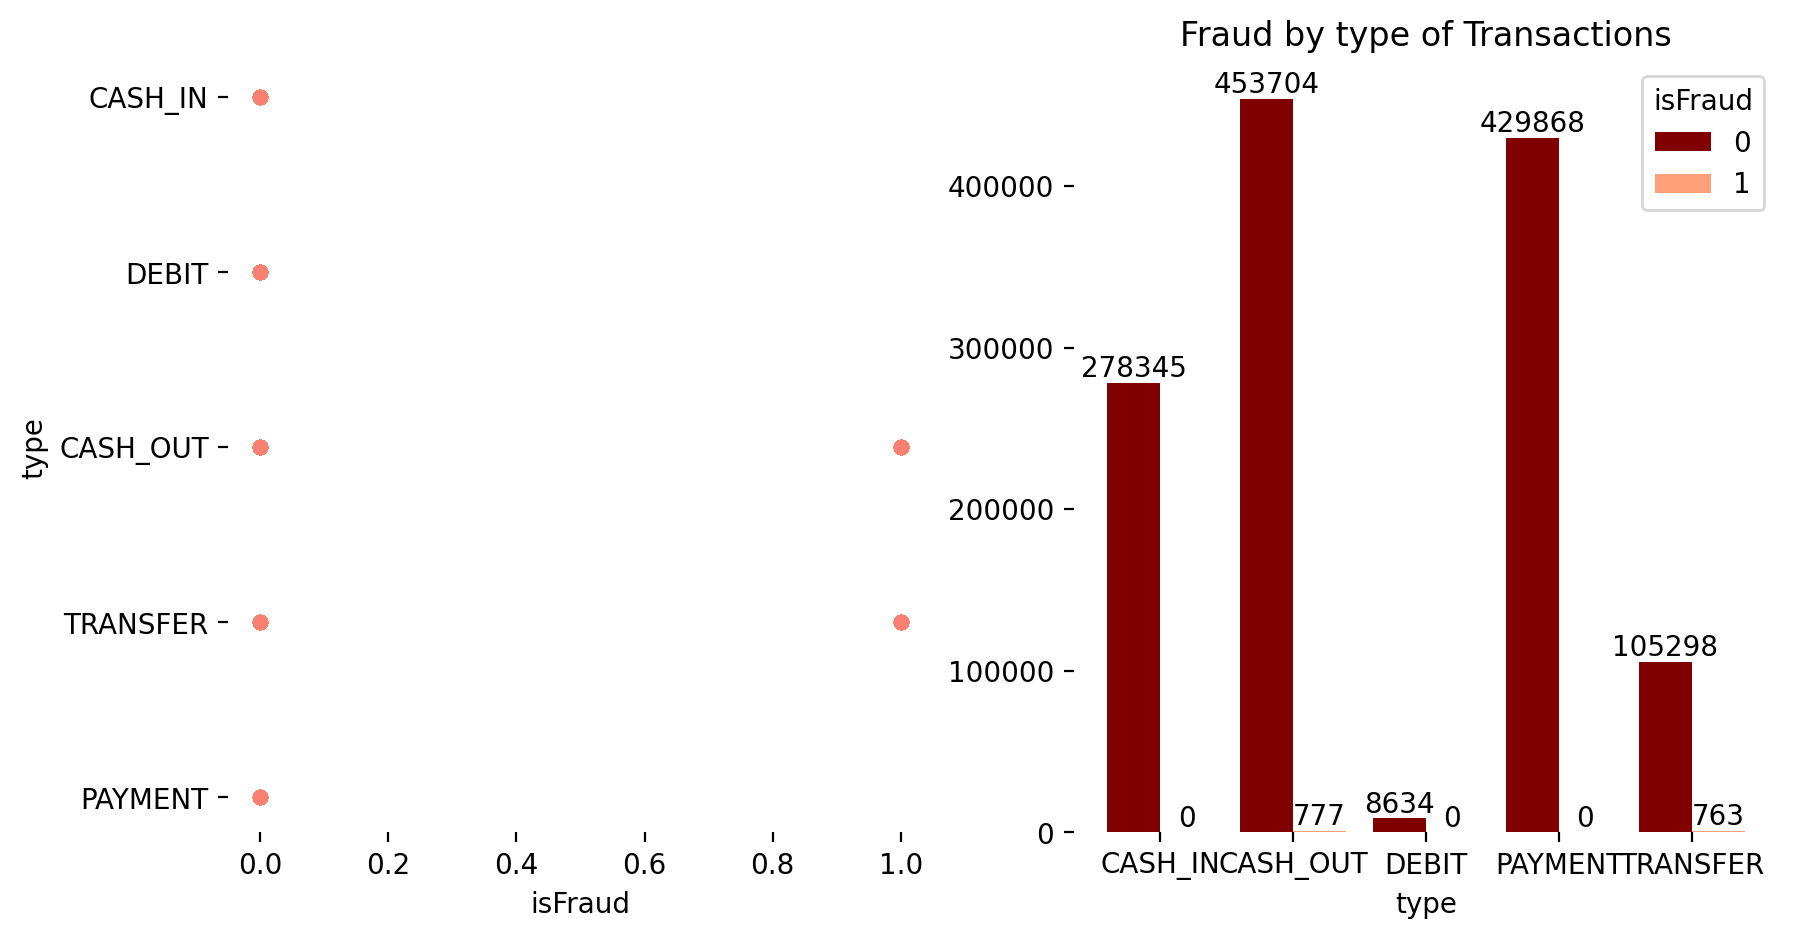

In [20]:
# variables
fraud = pd.concat([data.isFraud, data.type], axis=1)
fraudtype = pd.crosstab(data.type,data.isFraud,rownames=['Transaction type'],margins=True)
fraudtype1 = pd.DataFrame(fraudtype).style.background_gradient(cmap ='RdBu')
# crate the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# unpack all the axes subplots
axe = axes.ravel()
# assign the plot to each subplot in axe
for i, c in enumerate(data.columns):
    fraud.plot.scatter(x='isFraud', y= 'type',color= 'salmon',ax=axe[0]);
# crosstab plot
q = pd.crosstab(data.type,df.isFraud)
x=q.plot(kind='bar', rot=0,color=color,width=0.8,ax=axe[1])
for container in x.containers:
   x.bar_label(container) 
#plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=2,framealpha=0.0)
plt.title('Fraud by type of Transactions')
plt.rc('axes',edgecolor='None')

>- It is surprising that transfer transactions have experienced fraud, since they are one of the least used types, accounting for only 8% of all transactions.

In [21]:
fraudtype = pd.crosstab(data.type,data.isFraud,rownames=['Transaction type'],margins=True)
fraudtype1 = pd.DataFrame(fraudtype).style.background_gradient(cmap ='RdBu')

display(fraudtype1)

isFraud,0,1,All
Transaction type,,,
CASH_IN,278345,0,278345
CASH_OUT,453704,777,454481
DEBIT,8634,0,8634
PAYMENT,429868,0,429868
TRANSFER,105298,763,106061
All,1275849,1540,1277389


Two types of transactions has fraud in their entries.
>- CASH_OUT (777)
>- TRANSFER (763)

**Let's explore more.*

#### 3.4.4 nameOrig	| nameDest

In [22]:
Orig_fraud = data[(data.isFraud ==1) & (data.nameOrig)]
Orig_fraud.head().style.background_gradient(cmap ='RdBu')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0
251,1,TRANSFER,2806.000000,C1420196421,2806.000000,0.000000,C972765878,0.000000,0.000000,1,0
252,1,CASH_OUT,2806.000000,C2101527076,2806.000000,0.000000,C1007251739,26202.000000,0.000000,1,0
680,1,TRANSFER,20128.000000,C137533655,20128.000000,0.000000,C1848415041,0.000000,0.000000,1,0


In [23]:
dupnameOrig = data[(data.nameOrig.duplicated().sum()) & (data.isFraud ==1)]
dupnameOrig.head(3).style.background_gradient(cmap ='RdBu')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0
251,1,TRANSFER,2806.000000,C1420196421,2806.000000,0.000000,C972765878,0.000000,0.000000,1,0


In [24]:
# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraud = data[data.isFraud == 1]
not_fraud = data[data.isFraud == 0]
fraud_transfer = fraud[fraud.type == "TRANSFER"]
fraud_cashout = fraud[fraud.type == "CASH_OUT"]

fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

>- There are no specific accounts from which fraud transactions are carried out, but seems to have duplicated accounts.
>- The account of the recipient of a fraudulent transfer was not used as the sending account for collection.
>-  It seems that fraudulent transactions occur between customers. Let's explore more.

In [25]:
# check for duplicates nameOrig	nameDest
a = pd.DataFrame(data.nameOrig.duplicated().value_counts())
b = pd.DataFrame(data.nameDest.duplicated().value_counts())
c = pd.concat([a,b],axis=1,)
c.style.background_gradient(cmap ='RdBu')

,nameOrig,nameDest
False,1277006,546958
True,383,730431


>- In fact, as can be seen, nameOrig has 383 duplicated accounts and nameDest has 730,431.

In [26]:
fraud_df = data.copy()
fraud_df.account = np.nan
fraud_df.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('C'),'account'] = "CC" 
fraud_df.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('M'),'account'] = "CM"
fraud_df.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('C'),'account'] = "MC"
fraud_df.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('M'),'account'] = "MM"
results = fraud_df['account'].groupby(data.isFraud ==1).value_counts()
results

isFraud  account
False    CC         845981
         CM         429868
True     CC           1540
Name: account, dtype: int64

>- All fraud transactions comes from Customer to Customer accounts.

#### 3.4.5 Amount

Text(0.5, 1.0, 'amount vs Fraud')

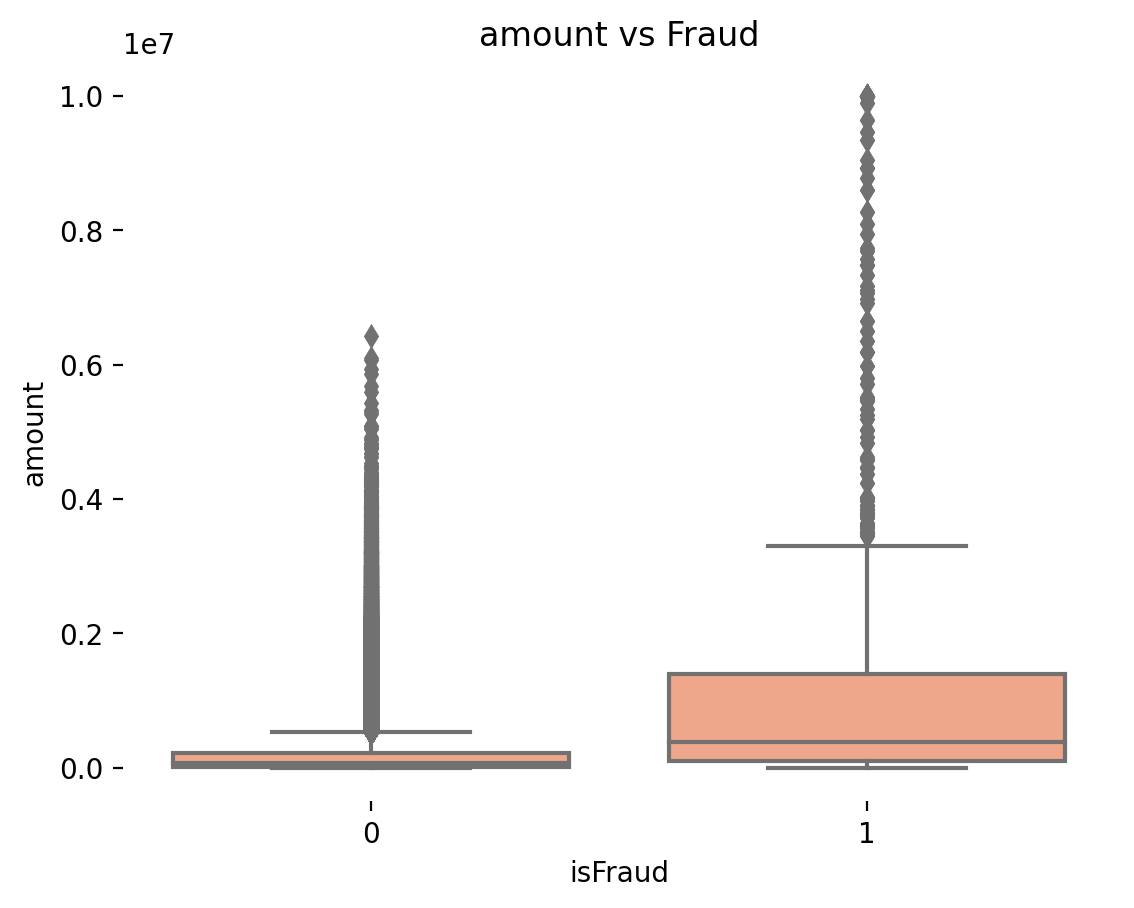

In [27]:
sns.boxplot(x = 'isFraud', y = 'amount', data = fraud_df, color = 'lightsalmon').set_title('amount vs Fraud')

>- Fraud is prevalent in transactions involving amounts of money.
Let's explore more.

In [28]:
amount_stats = data.amount.describe().round(2)
amount_stats = pd.DataFrame(amount_stats)
amount_stats.style.background_gradient(cmap ='RdBu')

,amount
count,1277389.000000
mean,162935.790000
std,273529.190000
min,0.100000
25%,12808.290000
50%,78357.770000
75%,218384.740000
max,10000000.000000


- From the 1,277,389 transactions, the range of "amount" varies from 0.10¢ to $10 millions.

- The average amount figure at $$162,935.79, while the median are in $78357.77.

In [29]:
# Sorting fraudulent transactions by amount
Sorting_fraud = data.query('isFraud == 1').sort_values('amount', ascending = False).head(10).style.background_gradient(cmap ='RdBu')
# navigate through min and max by changing ascending parameter to True or to False

display(Sorting_fraud)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1030560,72,CASH_OUT,10000000.000000,C1438388258,10000000.000000,0.000000,C1089455271,81810.420000,10081810.420000,1,0
1030709,86,TRANSFER,10000000.000000,C1843531771,18931607.890000,8931607.890000,C632110164,0.000000,0.000000,1,0
1030687,84,TRANSFER,10000000.000000,C792651637,14830219.150000,4830219.150000,C397396936,0.000000,0.000000,1,0
586312,33,CASH_OUT,10000000.000000,C29118015,10000000.000000,0.000000,C1379703840,0.000000,10000000.000000,1,0
586311,33,TRANSFER,10000000.000000,C1439740840,19887819.060000,9887819.060000,C875288652,0.000000,0.000000,1,0
1030688,84,CASH_OUT,10000000.000000,C824646662,10000000.000000,0.000000,C1917849910,0.000000,10000000.000000,1,0
1054999,96,TRANSFER,10000000.000000,C2037845109,18267760.500000,8267760.500000,C666339947,0.000000,0.000000,1,0
1059699,118,CASH_OUT,10000000.000000,C1348396248,10000000.000000,0.000000,C1954217280,0.000000,10000000.000000,1,0
1030710,86,CASH_OUT,10000000.000000,C538142346,10000000.000000,0.000000,C557678014,0.000000,10000000.000000,1,0
4440,4,TRANSFER,10000000.000000,C7162498,12930418.440000,2930418.440000,C945327594,0.000000,0.000000,1,0


>- Fraud is highly prevalent in transactions involving both large and small amounts of money.
>- Among fraudulent transactions, the highest amount was $$10 million while the lowest amount was $119, a huge disparity between them.

#### 3.4.6 oldbalanceOrg | newbalanceDest

In [30]:
giving_errors = (100*round(sum(data.oldbalanceOrg - data.amount != data.newbalanceOrig)/len(data),2))# errors in payments
receiving_errors = (100*round(sum(data.newbalanceDest + data.amount != data.newbalanceDest)/len(data),2))# errors in receiving money
print('Fraudulent errors in the payment: ',giving_errors,'\nFraudulent errors in the money received: ',receiving_errors )

Fraudulent errors in the payment:  85.0 
Fraudulent errors in the money received:  100.0


Text(0.5, 1.0, 'oldbalanceOrig vs Fraud')

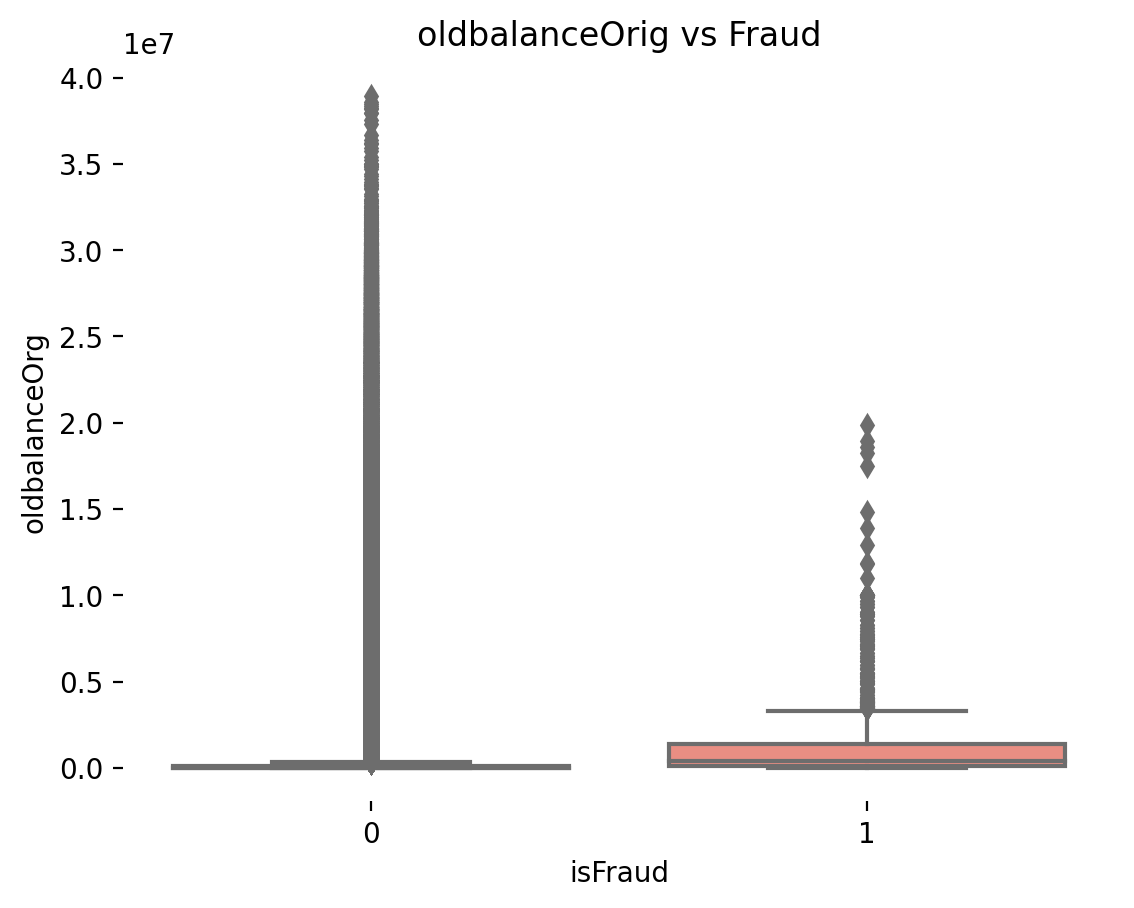

In [31]:
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = fraud_df, color = "salmon").set_title('oldbalanceOrig vs Fraud')

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

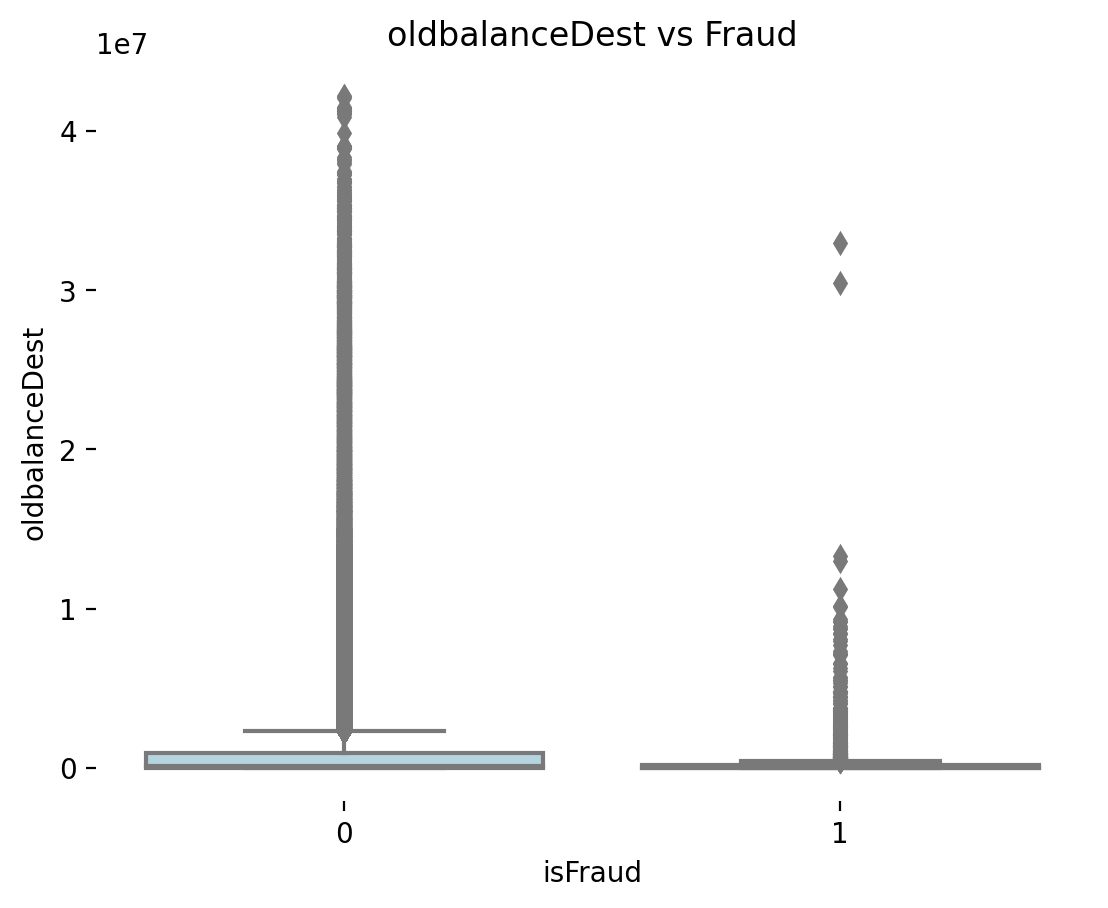

In [32]:
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = fraud_df, color ="lightblue").set_title('oldbalanceDest vs Fraud')

>- There are too many errors due to unknown causes in the calculation of the balances before and after the transaction.

#### Data Cleaning
One of the most essential aspects of successful data science project is Data cleaning, also known as data munging or the process of examining raw data and condensing it into a more usable form for a project. The goal of data cleaning is to prepare the data for use in modeling, and it is often the most time-consuming task including:
- Remove duplicate, irrelevant observations or incomplete data
- Fix structural errors
- Filter unwanted outliers
- Handle missing data
- Data reduction     

Learn more : https://www.tableau.com/learn/articles/what-is-data-cleaning#:~:text=tools%20and%20software-,What%20is%20data%20cleaning%3F,to%20be%20duplicated%20or%20mislabeled.

#### 4.2 Data Reduction      
Some columns can be dropped if they do not add value to our analysis.

In [33]:
# delete unwanted column
data.drop(columns=['isFlaggedFraud'],inplace = True)

### 5. Data visualization
Data visualization is the representation of data using common graphics, such as charts, plots, infographics, and animations.            
Learn more: https://www.ibm.com/topics/data-visualization#:~:text=the%20next%20step-,What%20is%20data%20visualization%3F,that%20is%20easy%20to%20understand.

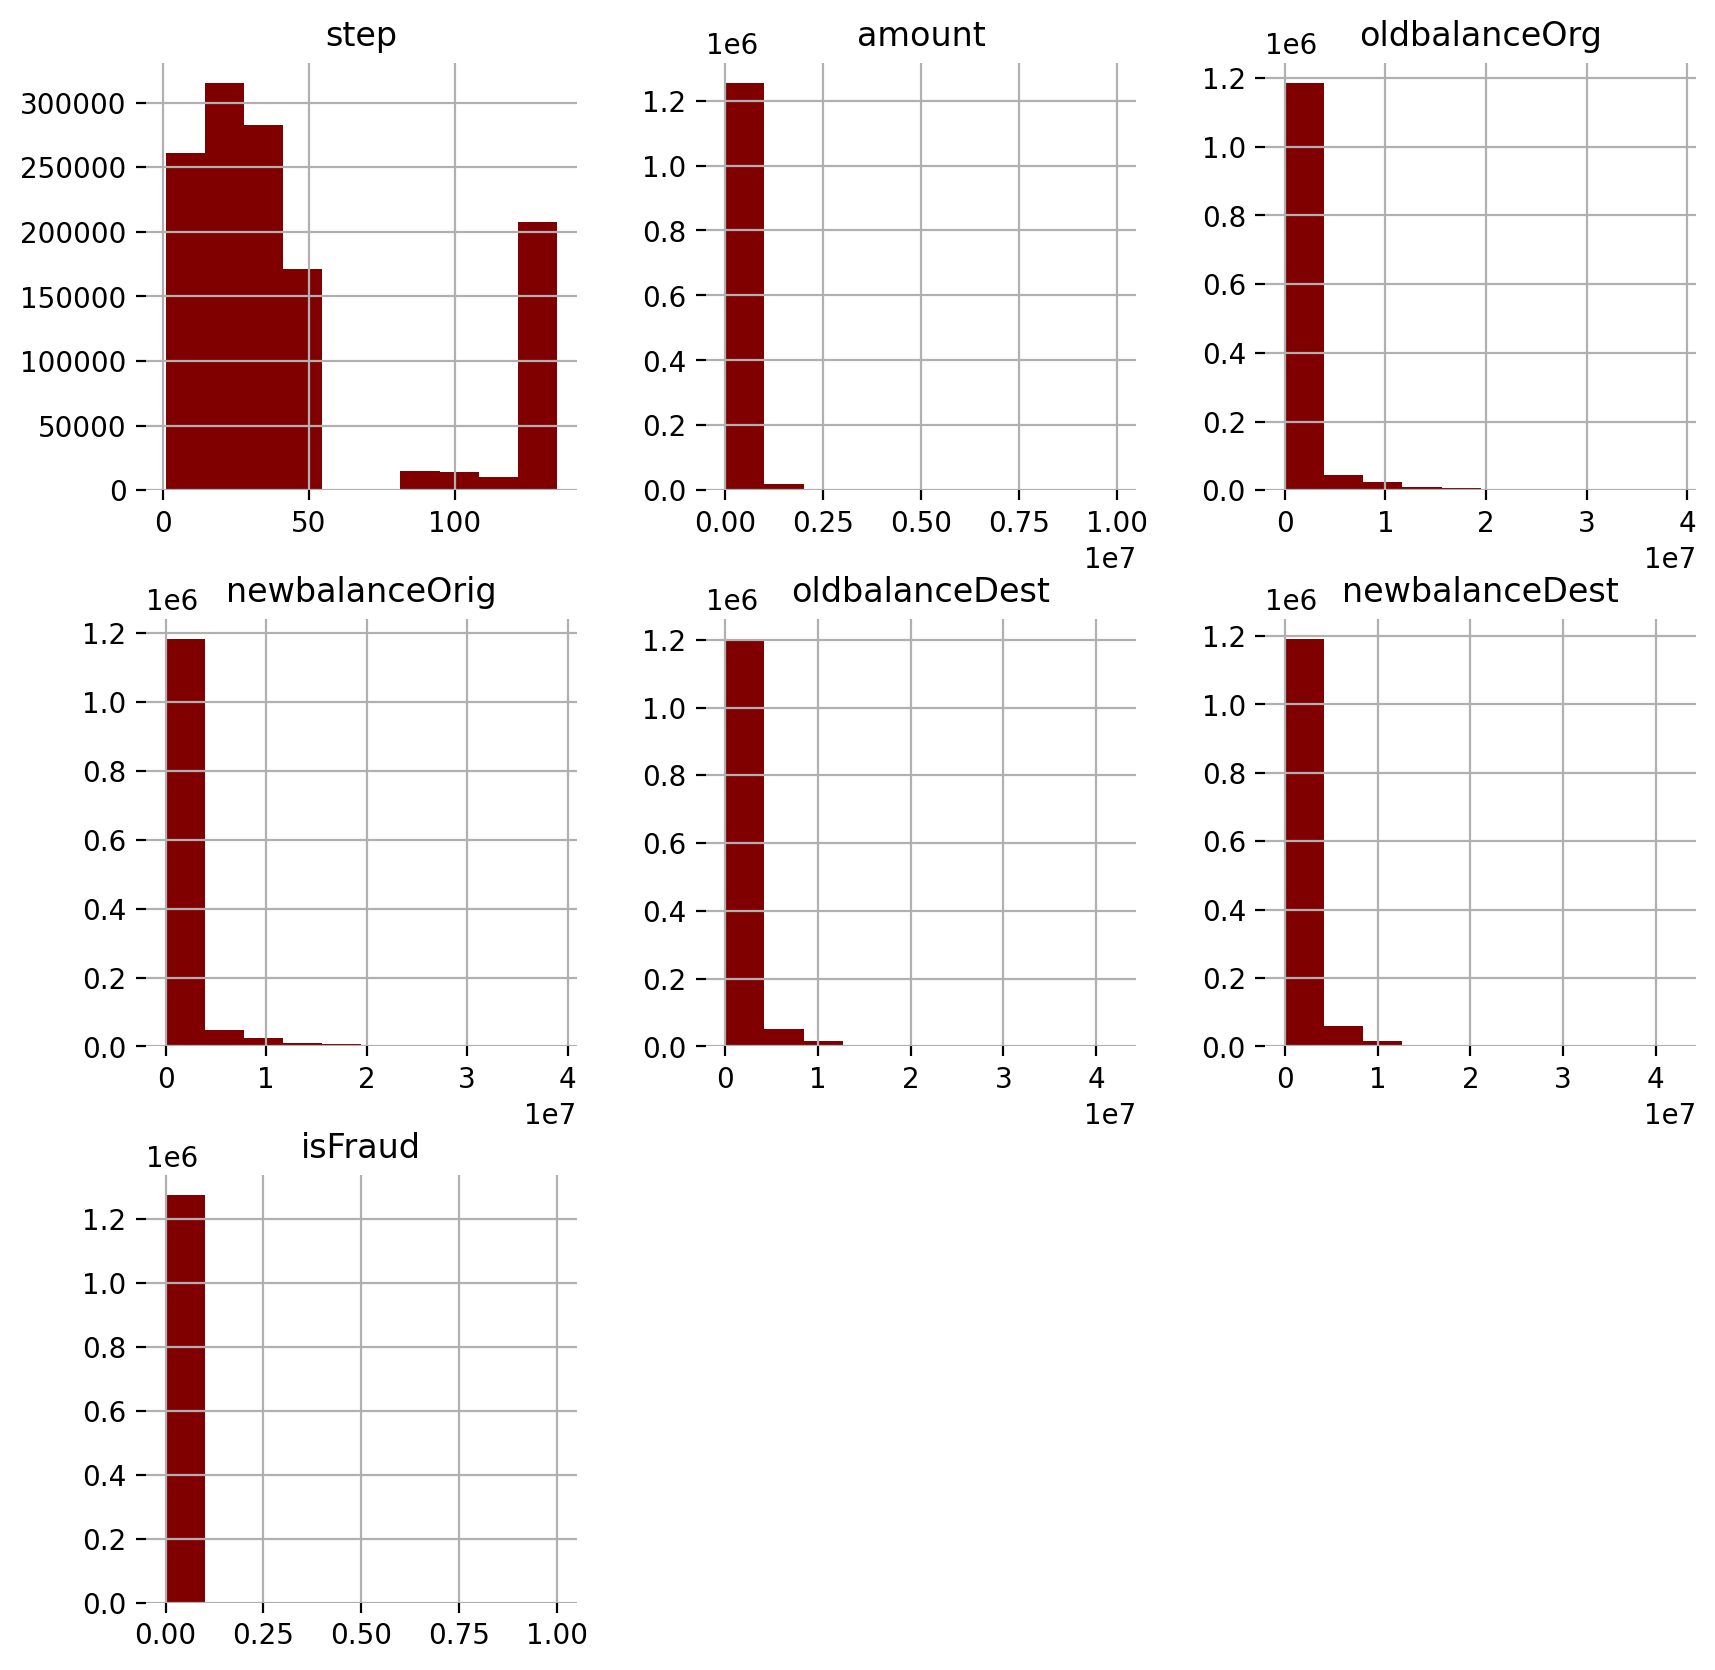

In [34]:
# data visualization
data.hist(figsize = (10,10),color = 'maroon')
plt.show()

### 6. Statistics
This information provides a quick and simple description of the data, including count, mean, median, mode, minimum value, maximum value, range, standard deviation, and interquartile range. The statistics summary gives a high-level idea to identify whether the data has any outliers, data entry errors, or distributions, such as whether the data is normally distributed or skewed to the left or right.

#### 6.1 Basic Satistics

In [35]:
# Basic Satistics 
stats = data.describe()
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
out_fields = ['mean','25%','50%','75%', 'range']
stats = stats.loc[out_fields]
stats.rename({'50%': 'median'}, inplace=True)
stats.style.background_gradient(cmap = 'RdBu')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
mean,45.341209,162935.791810,874594.497069,895007.210123,985967.840483,1118358.412631,0.001206
25%,16.000000,12808.290000,0.000000,0.000000,0.000000,0.000000,0.000000
median,35.000000,78357.770000,15544.000000,0.000000,129110.840000,223015.140000,0.000000
75%,44.000000,218384.740000,130285.420000,170850.570000,928566.480000,1157143.330000,0.000000
range,134.000000,9999999.900000,38939424.030000,38946233.020000,42207404.590000,42207404.590000,1.000000


#### 6.2 Skewness or bias
>Skewness is the statistical measure of the asymmetry of the probability distribution of a real-valued random variable about its mean that describes the symmetry of the distribution around an average. 

Learn more: https://en.wikipedia.org/wiki/Skewness  |  https://www.geeksforgeeks.org/python-pandas-dataframe-skew/

- Lets explore the distribution and skewness of each variable.

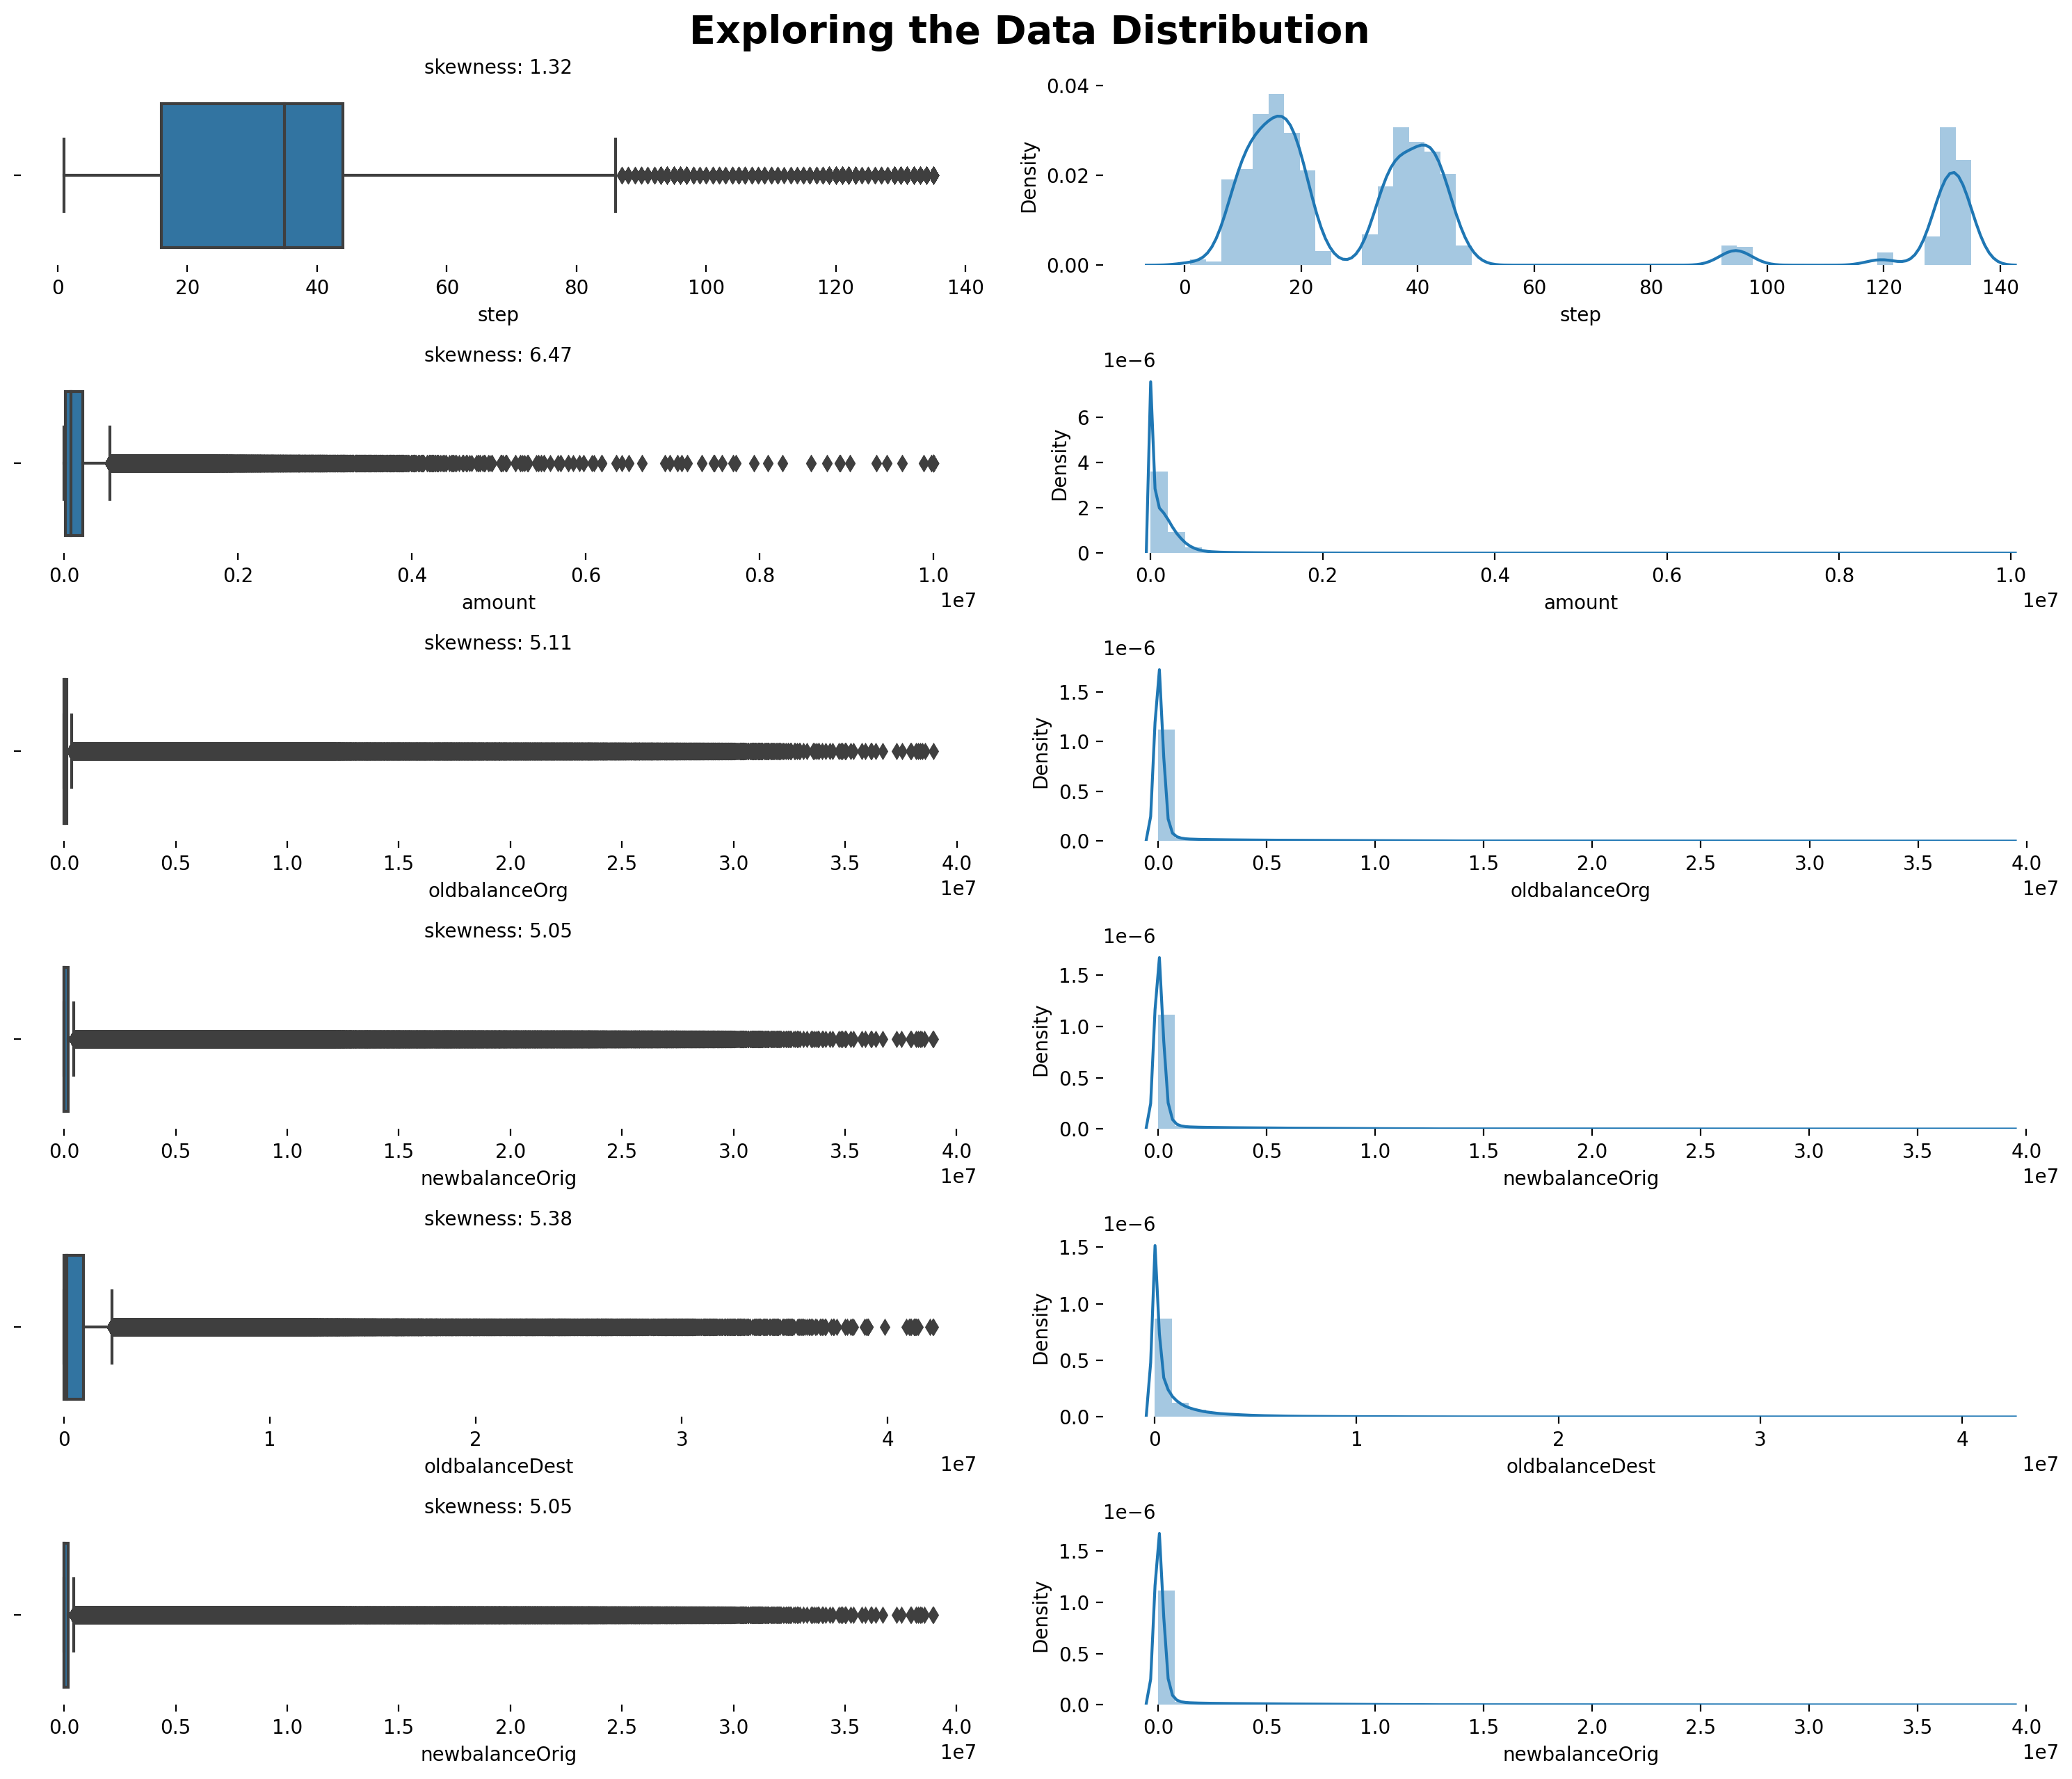

In [36]:
### Exploring the range and distribution of numerical Variables
fig, ax = plt.subplots(6, 2, figsize = (15,13))
color=color
# step
sns.boxplot(x= data.step,ax = ax[0,0]).set_title('skewness: '+str(round(data.step.skew(axis= 0,skipna = True),2)),fontsize=10)
sns.distplot(data.step, ax = ax[0,1])
# amount
sns.boxplot(x= data.amount, ax = ax[1,0]).set_title('skewness: '+str(round(data.amount.skew(axis= 0,skipna = True),2)),fontsize=10)
sns.distplot(data.amount, ax = ax[1,1])
# oldbalanceOrg
sns.boxplot(x= data.oldbalanceOrg,ax = ax[2,0]).set_title('skewness: '+str(round(data.oldbalanceOrg.skew(axis= 0,skipna = True),2)),fontsize=10)
sns.distplot(data.oldbalanceOrg, ax = ax[2,1])
#newbalanceOrig
sns.boxplot(x= data.newbalanceOrig,ax= ax[3,0]).set_title('skewness: '+str(round(data.newbalanceOrig.skew(axis= 0,skipna = True),2)),fontsize=10)
sns.distplot(data.newbalanceOrig, ax = ax[3,1])
# oldbalanceDest
sns.boxplot(x= data.oldbalanceDest, ax = ax[4,0]).set_title('skewness: '+str(round(data.oldbalanceDest.skew(axis= 0,skipna = True),2)),fontsize=10)
sns.distplot(data.oldbalanceDest,ax = ax[4,1])
#newbalanceOrig 
sns.boxplot(x= data.newbalanceOrig, ax = ax[5,0]).set_title('skewness: '+str(round(data.newbalanceOrig.skew(axis= 0,skipna = True),2)),fontsize=10)
sns.distplot(data.newbalanceOrig, ax = ax[5,1])

fig.suptitle('Exploring the Data Distribution ', fontsize = 20, fontweight = "bold");
plt.subplots_adjust(top=0.8,hspace=1.8)
plt.tight_layout()

#### 6.3 Detecting and removing outlier


In [37]:
def IQR_method(data,n,features):
    outlier_list = []
    for column in features:
        Q1 = np.percentile(data[column],0.25) # 1st quartile (25%)
        Q3 = np.percentile(data[column],0.75) # 3rd quartile (75%)
        IQR = Q3 - Q1 # Interquartile range (IQR)
        outlier_step = 1.5 * IQR # outlier step
        outlier_list_column = data[(data[column] < Q1 - outlier_step) | (data[column] > Q3 + outlier_step )].index # Determining a list of indices of outliers
        outlier_list.extend(outlier_list_column)# appending the list of outliers      
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    out1 = data[data[column] < Q1 - outlier_step]
    out2 = data[data[column] > Q3 + outlier_step]
    
    print('Deleted outliers:', out1.shape[0]+out2.shape[0])
    return multiple_outliers

In [38]:
num_cols = data.select_dtypes(include=['float64', 'int64'])
Outliers_IQR = IQR_method(data,1,num_cols)
df_out = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Deleted outliers: 1540


>- The program found and delete 1,540 outliers to delete were found according to the parameters established by the interquartile range between Q1 - Q3.

## 7. Correlation

In [39]:
corr_matrix = data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
corr_matrix.style.background_gradient(cmap = "RdBu")

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.025247,-0.001003,-0.000664,0.007000,-0.001490,0.016613
amount,0.025247,1.000000,0.001452,-0.005309,0.212048,0.310301,0.137525
oldbalanceOrg,-0.001003,0.001452,1.000000,0.998985,0.093285,0.063671,0.004723
newbalanceOrig,-0.000664,-0.005309,0.998985,1.000000,0.095209,0.063291,-0.009878
oldbalanceDest,0.007000,0.212048,0.093285,0.095209,1.000000,0.980014,-0.007874
newbalanceDest,-0.001490,0.310301,0.063671,0.063291,0.980014,1.000000,-0.000147
isFraud,0.016613,0.137525,0.004723,-0.009878,-0.007874,-0.000147,1.000000


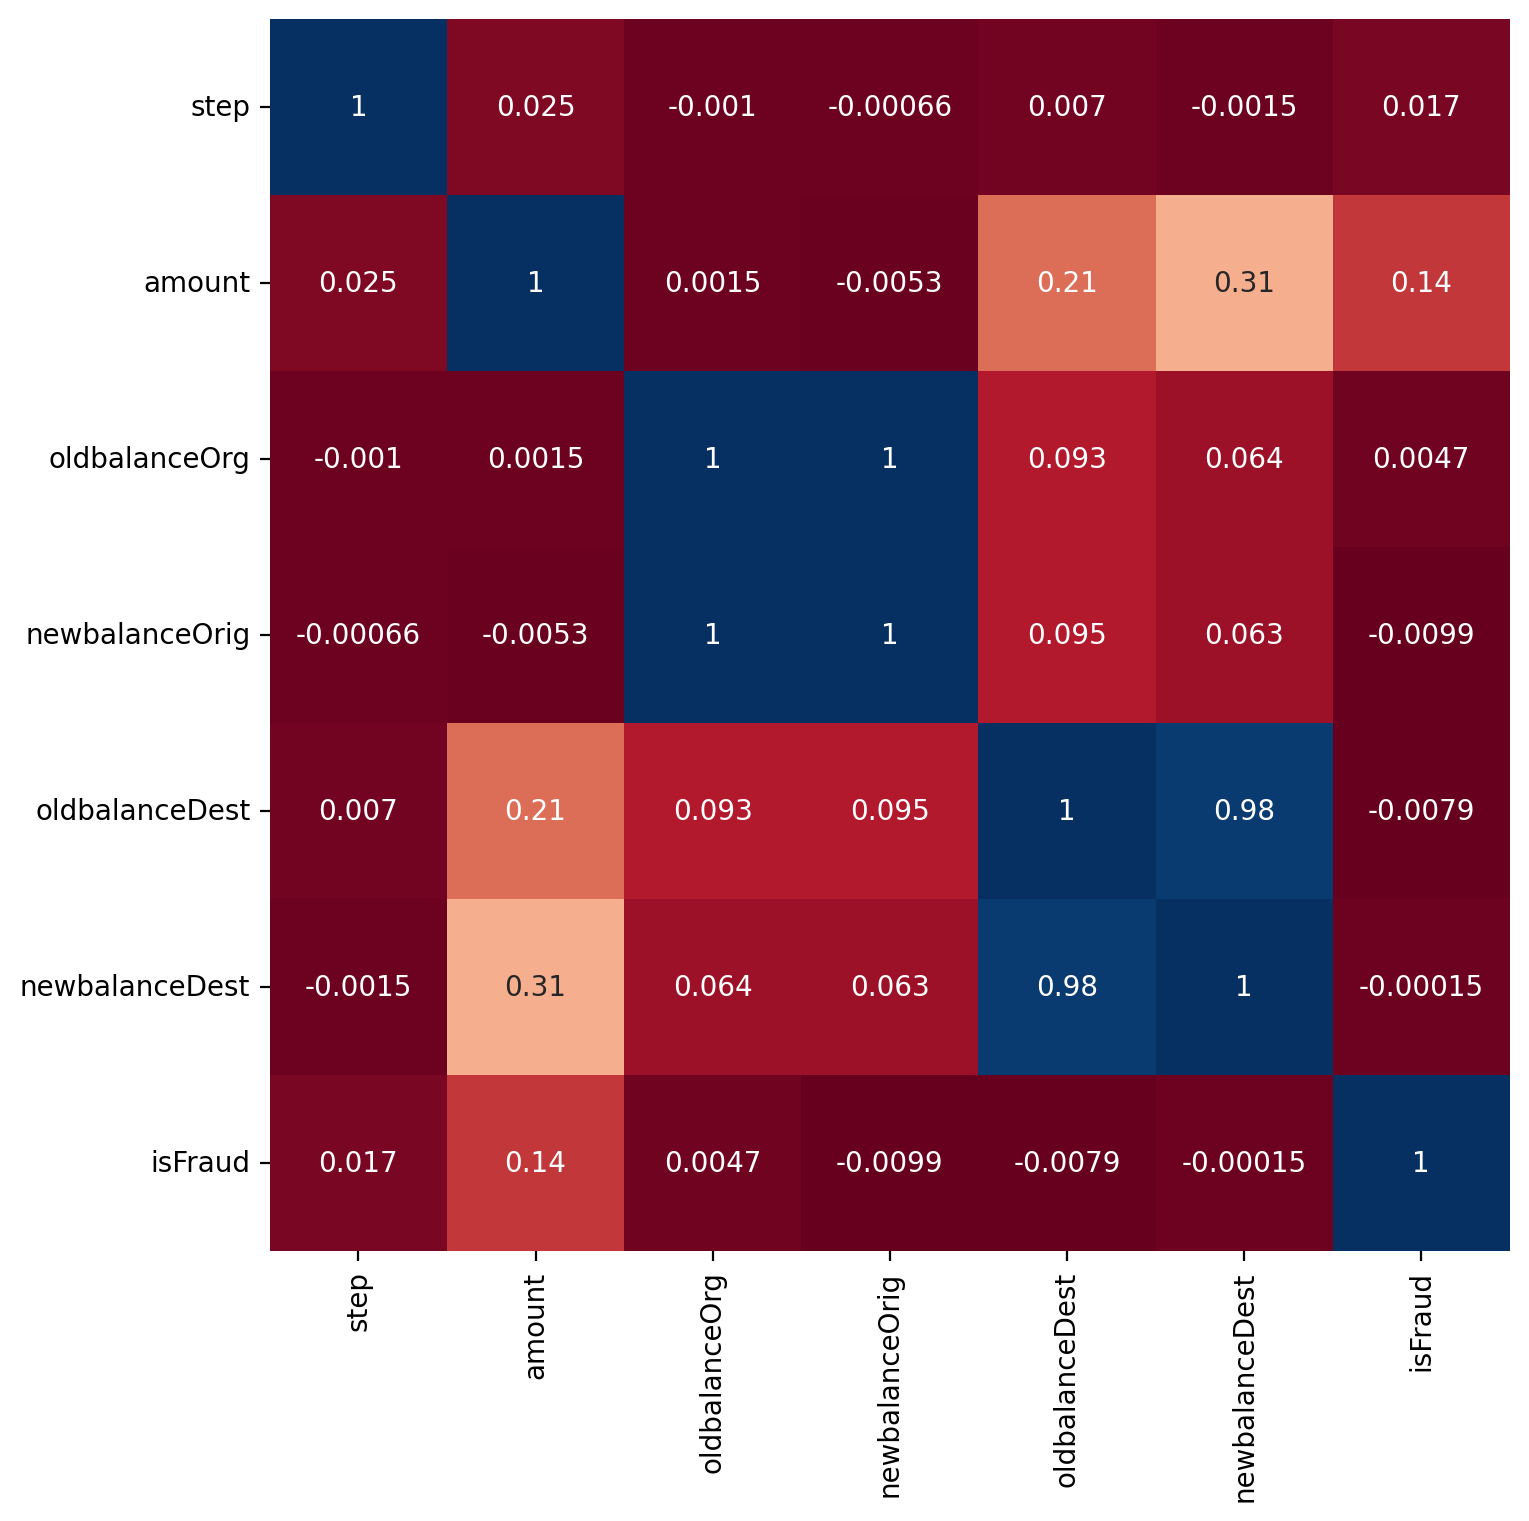

In [40]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(),annot=True,cmap='RdBu',cbar=False)  
plt.show()

In [41]:
#  Correlation betwen numerical variables
def tidy_corr_matrix(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable 1','variable 2','Pearsons r']
    corr_mat = corr_mat.loc[corr_mat['variable 1'] != corr_mat['variable 2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['Pearsons r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)   
    return(corr_mat)
print('abs_r: absolute values')

corr_matrix = data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
corr = data.corrwith(data.isFraud).sort_values(ascending = False).to_frame()
corr.columns = ['correlation']

df5 = tidy_corr_matrix(corr_matrix).head(10).style.background_gradient(cmap = "RdBu")
df6 = corr.style.background_gradient(cmap = "RdBu")
display_side_by_side(df5, df6)

abs_r: absolute values


,variable 1,variable 2,Pearsons r,abs_r
17,oldbalanceOrg,newbalanceOrig,0.998985,0.998985
23,newbalanceOrig,oldbalanceOrg,0.998985,0.998985
39,newbalanceDest,oldbalanceDest,0.980014,0.980014
33,oldbalanceDest,newbalanceDest,0.980014,0.980014
12,amount,newbalanceDest,0.310301,0.310301
36,newbalanceDest,amount,0.310301,0.310301
11,amount,oldbalanceDest,0.212048,0.212048
29,oldbalanceDest,amount,0.212048,0.212048
43,isFraud,amount,0.137525,0.137525
13,amount,isFraud,0.137525,0.137525


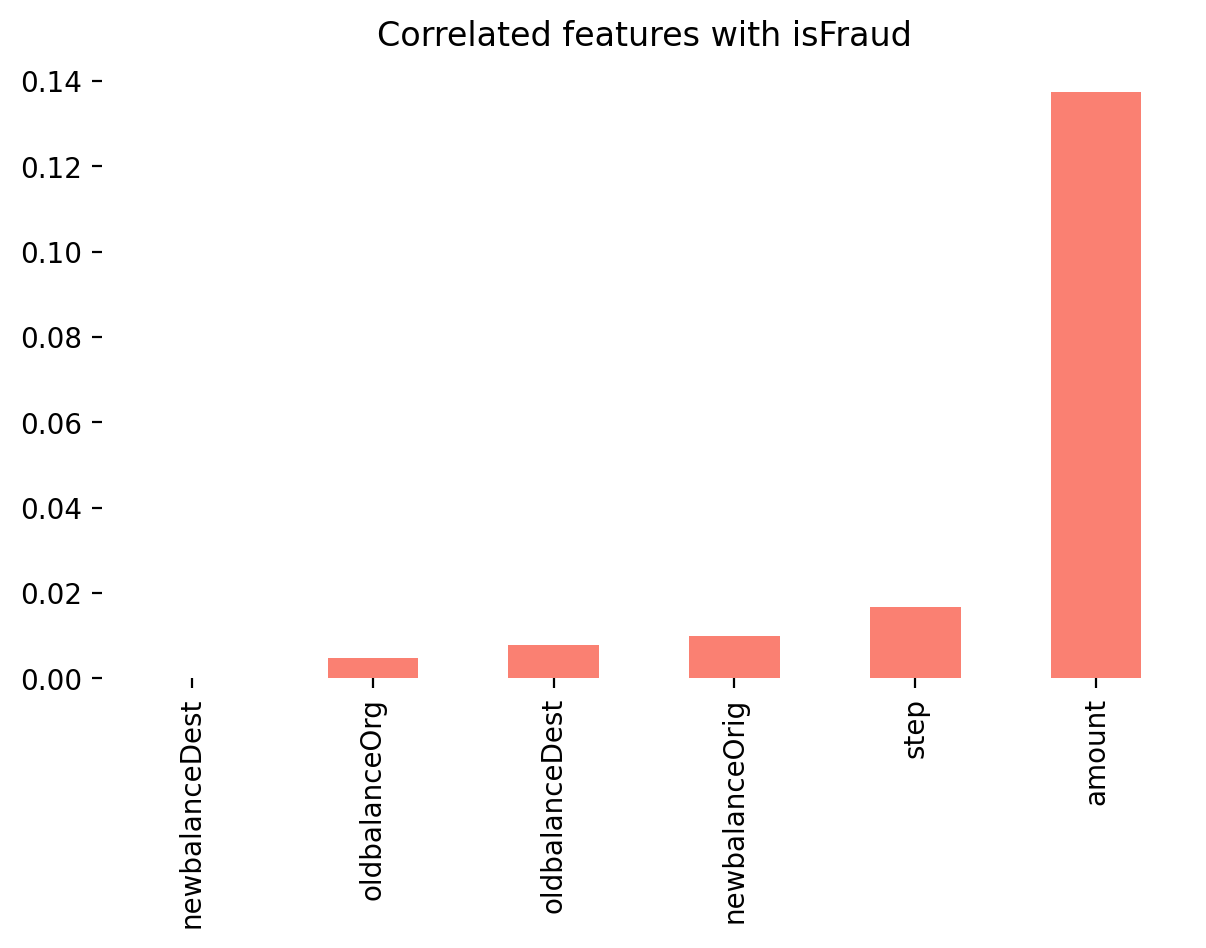

In [42]:
plt.figure(figsize=(7,4))
d = data.corr()['isFraud'][:-1].abs().sort_values().plot(kind='bar',color = 'salmon', title='Correlated features with isFraud')

 For feature selection, we will exclude those features having correlation values between [-0.1,0.1].         

> Variables selected for models:
> - oldbalanceOrg
> - newbalanceOrig
> - amount
> - newbalanceDest
> - oldbalanceDest
> - step
>
The most related variables were oldbalanceOrg, which was correlated with newbalanceOrig at 0.99%, and newbalanceDest, which was correlated with oldbalanceDest at 0.98%.

## 8. Models 

In [43]:
train = pd.read_csv("onlinefraud.csv")
fraud = train.isFraud == 1

### 8.2 Features engineering

In [45]:
# drop unwanted columns
train.drop(columns=['isFlaggedFraud'],inplace = True)
# Transform categorical features into numerical
train.type = train.type.map({'CASH_OUT':0,'PAYMENT': 1, 'CASH_IN': 2,'TRANSFER':3,'DEBIT':4})
# Save clean Data to csv
train.to_csv('Clean_onlinefraud.csv', index=False)
df2 = train.copy()

In [ ]:
train.head().style.background_gradient(cmap = "RdBu")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000,0
1,1,1,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000,0
2,1,3,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1
3,1,0,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1
4,1,1,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000,0


#### Target variable Visualization

In [48]:
# X: data columns - y: target variable
def prep_data(data: pd.DataFrame) -> (np.ndarray, np.ndarray):
    X = data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]].values
    y = data.isFraud.values
    return X, y

# create a scatter plot with labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Non Fraud", alpha=0.5, linewidth=0.15,c='lightblue')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraud", alpha=0.5, linewidth=0.15, c='lightsalmon')
    plt.legend()
    return plt.show()

# Create X and y from the prep_data function 
X, y = prep_data(data)

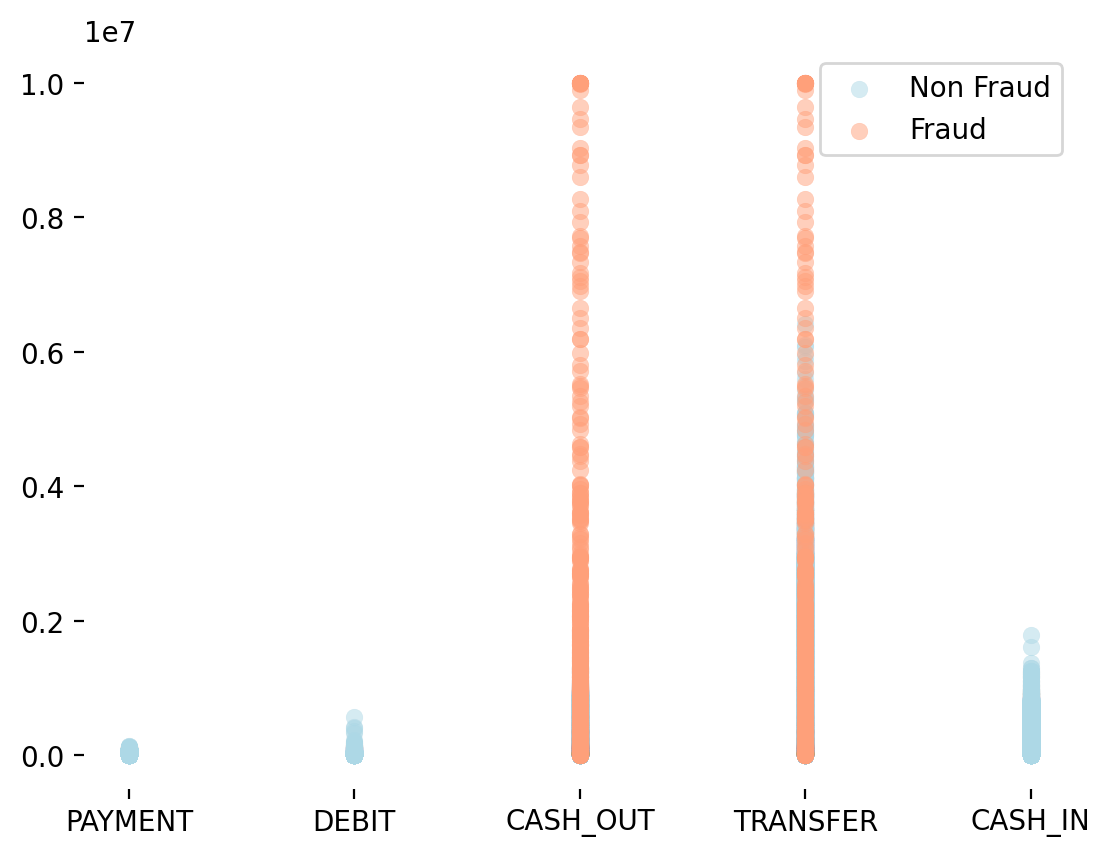

In [47]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

#### 8.3 Decision Tree with RandomUnderSampling & SMOTE

- https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

In [49]:
# train and test data
X = df2[['amount','oldbalanceOrg','newbalanceOrig']]
y = df2.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [50]:
# define model
model = DecisionTreeClassifier()
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=2)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv)
# summarize performance
print('Mean ROC AUC: %.2f' % mean(scores))

Mean ROC AUC: 0.98


In [51]:
# define model
model = XGBClassifier()
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=2)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv)
# summarize performance
print('Mean ROC AUC: %.2f' % mean(scores))

Mean ROC AUC: 1.00


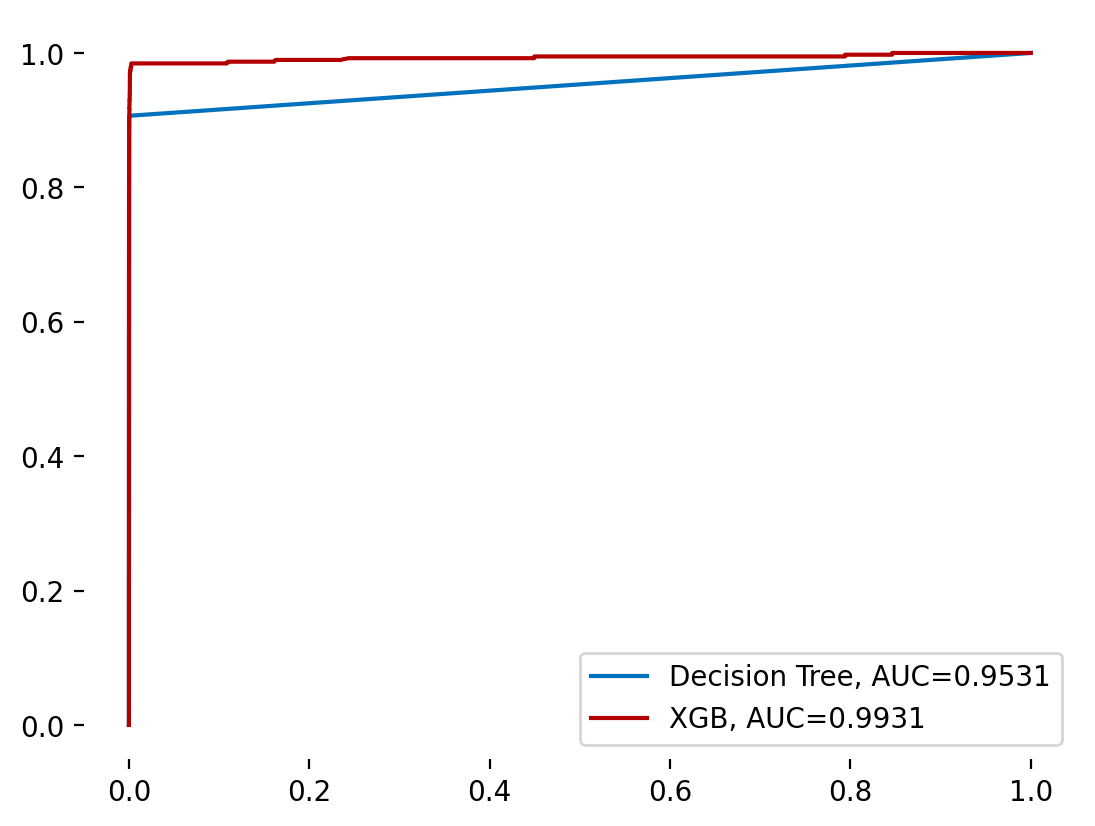

In [52]:
#fit gradient boosted model and plot ROC curve
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc),color="#0072BD")

#fit gradient boosted model and plot ROC curve
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGB, AUC="+str(auc),color="#b30000")

#add legend
plt.legend()

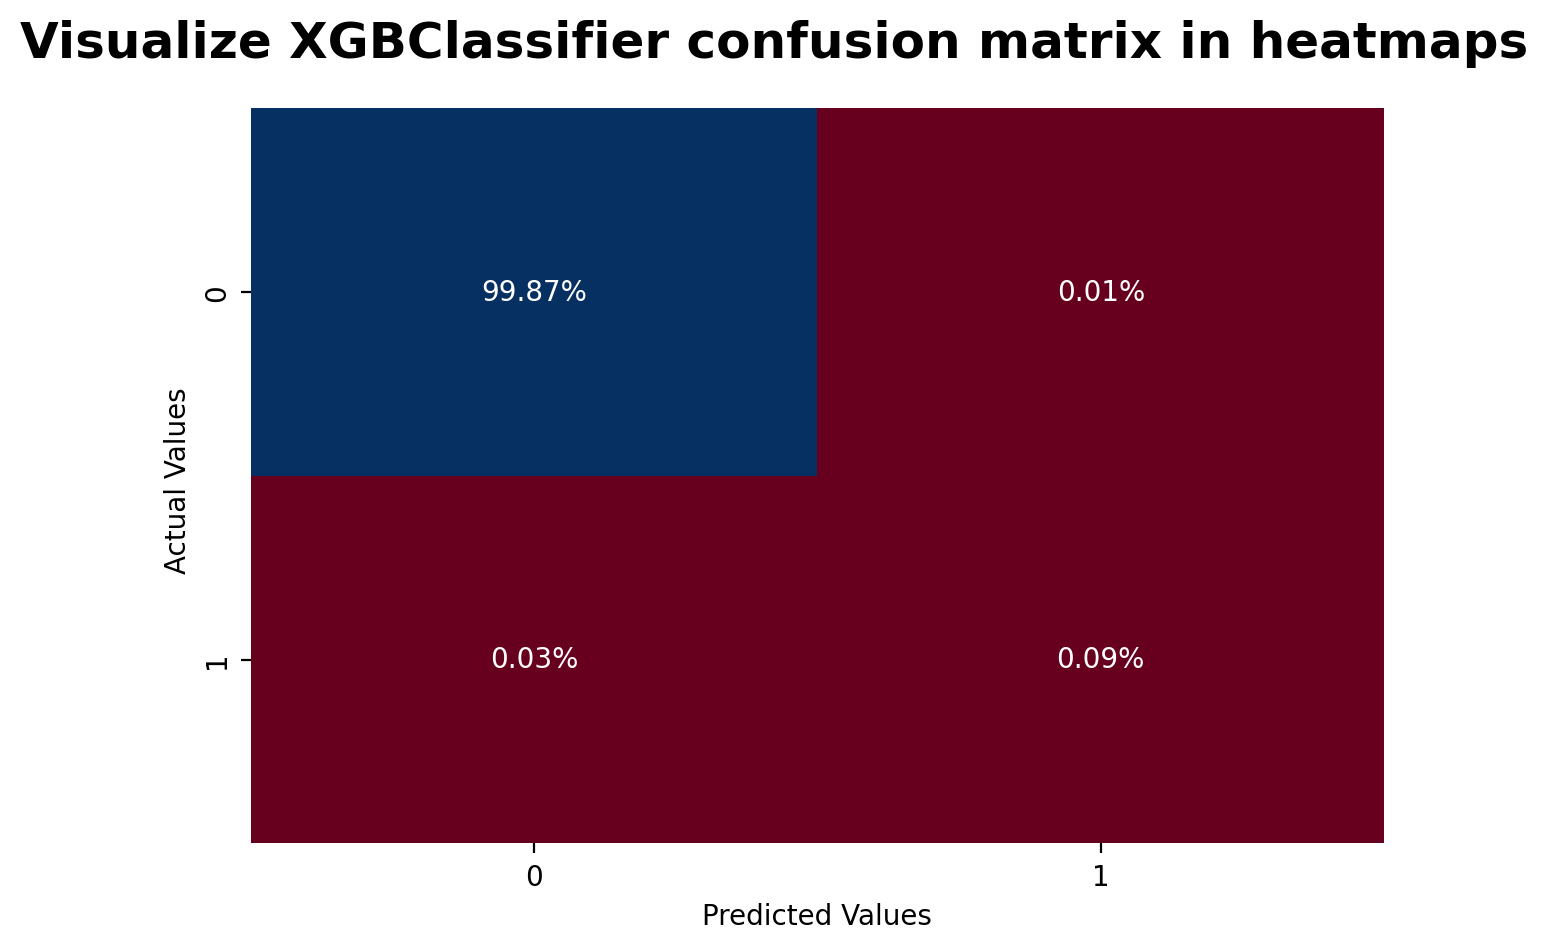

In [56]:
# Default parameters
xg_clf = XGBClassifier()
# training the model
xg_clf.fit(X_train,y_train)
# testing the model
xgb_clf_preds = xg_clf.predict(X_test)
# providing actual and predicted values
cm = confusion_matrix(y_test, xgb_clf_preds)
sub = fig.add_subplot().set_title(model)
cm_plot = sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap = 'RdBu',cbar= False)
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values ')
plt.subplots_adjust(top=0.9)
plt.suptitle('Visualize XGBClassifier confusion matrix in heatmaps', fontsize = 18, fontweight = "bold");
plt.tight_layout()

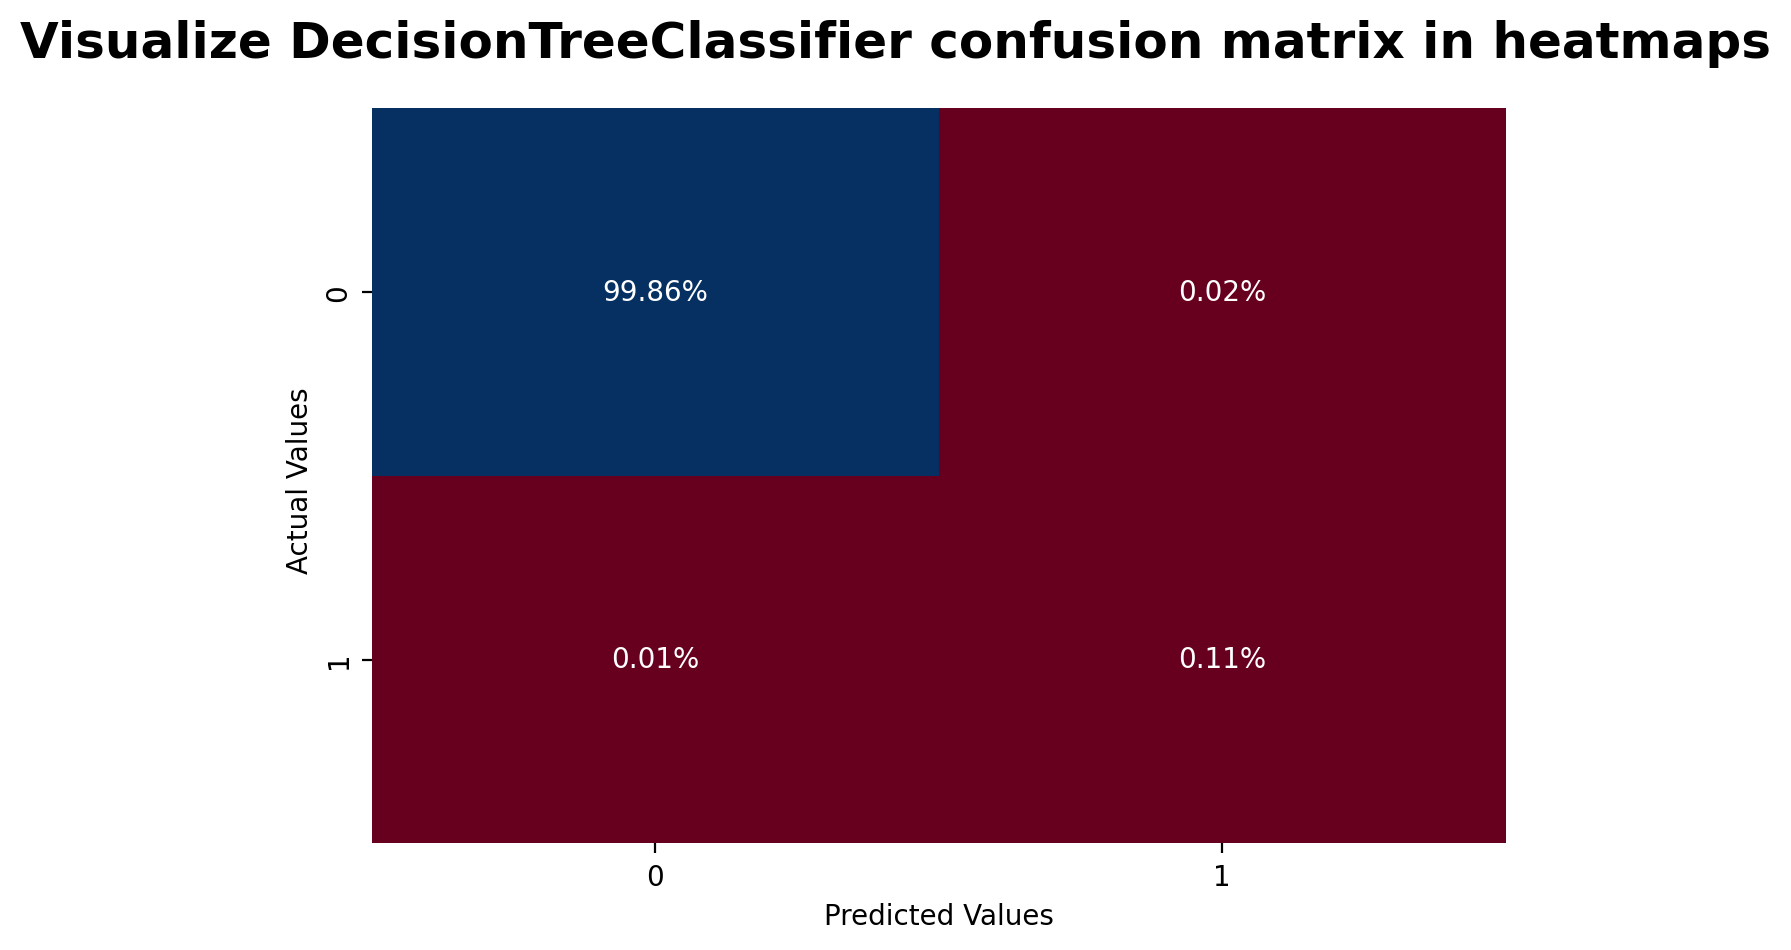

In [55]:
# Default parameters
model = DecisionTreeClassifier()
# training the model
model.fit(X_train,y_train)
# testing the model
model_preds = model.predict(X_test)
# providing actual and predicted values
cm = confusion_matrix(y_test, model_preds)
sub = fig.add_subplot().set_title(model)
cm_plot = sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap = 'RdBu',cbar=False)
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values ')
plt.subplots_adjust(top=0.9)
plt.suptitle('Visualize DecisionTreeClassifier confusion matrix in heatmaps', fontsize = 18, fontweight = "bold");
plt.tight_layout()

*Confusion Matrix is a popular way to represent summary findings.*
>- True Positives: Observations where both actual and predicted transactions were fraudulent.
>- True Negatives: Observations where both actual and predicted transactions were not fraudulent.
>- False Positives: Observations where actual transactions were not fraudulent but were predicted to be fraudulent.
>- False Negatives: Observations where actual transactions were fraudulent but were not predicted to be fraudulent.

|                           |                           |
| :------------------------ | :------------------------ |
| True Negative (TN)        | False Positives (FP)      |
| False Negative (FN)       | True Positives (TP)       |
                                                      

# Conclusion

## Analysis Summary
   
From 1,275,849 online credit card transactions in the data, the amount of fraudulent transactions is minimal, less than 1%, resulting in an imbalance in the data. The imbalance in data will be processed using undersampling and oversampling techniques. Over time, fraudulent transactions have not had a significant change, remaining in progress. Transactions are distributed in various types. In first place is CASH OUT, which has the highest number of transactions, with 454,481 or 36% of the total transactions, of which 777 were fraudulent. Next, we have a payment transaction that is the second most frequent, with 429,868 or 34% of the total transactions, and no reported fraudulent transactions. Cash-in in third place has 278,345 transactions, all without fraud, accounting for 22% of the total, with 12% fewer frequency compared to the payment type. For its part, the transfer type, despite being one of the least frequent, has 106,061 transactions or 8%, of which 763 were fraudulent. Last in terms of frequency, but no less important, is the debit type, with no fraud and only 8,634 transactions, accounting for 1% of the total transactions.

In the nameOrig of the transactions, there are 383 duplicates; as for the nameDest, there are 730,431. The first character in nameOrig and nameDest for each value account types would be C for customer and M for merchant. Then the transactions would be: CC Customer to Customer, CM Customer to Merchant, MC Merchant to Customer, MM Merchant to Merchant. According to this, all fraud transactions come from Customer to Customer accounts. On the other hand, TRANSFER was not used as the sending account for CASH OUT. Also, fraud is highly prevalent in transactions involving both large and small amounts of money, with the highest amount being $$10 million and the lowest amount being $119, a huge disparity between them. Furthermore, there are too many errors due to unknown causes in the calculation of the balances before and after the transactions.

For data cleaning, a single column was removed as it did not add any value to our analysis. 1540 outliers were eliminated and, in terms of statistics and correlation, the most related variables were oldbalanceOrg, which was correlated with newbalanceOrig at 0.99%, and newbalanceDest, which was correlated with oldbalanceDest at 0.98%. For the preparation of data for modeling, some values were coded and the variables amount, oldbalanceOrg, and newbalanceOrig, were selected due to their correlation with our target variable, isFraud. RandomUnderSampling methods were used in combination with SMOTE to solve the class imbalance in two different classification models. The first was DecisionTreeClassifier, resulting in 98% Roc Auc, and XGBClassifier with 100%.



### References and resources:
- https://www.w3schools.com/python/pandas/pandas_intro.asp
- https://pandas.pydata.org/docs/user_guide/options.html
- https://realpython.com/html-css-python/ 
- https://www.ibm.com/topics/exploratory-data-analysis
- https://www.tableau.com/learn/articles/what-is-data-cleaning#:~:text=tools%20and%20software-,What%20is%20data%20cleaning%3F,to%20be%20duplicated%20or%20mislabeled.
- https://en.wikipedia.org/wiki/Skewness 
- https://www.geeksforgeeks.org/python-pandas-dataframe-skew/
- https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/